## I. PROJET 1 ##

### 1. Représentation des données 'Iris' avant réduction de dimensionnalité ###

##### _a. Préparation des données_ #####

In [1625]:
# Import des bibliothèques :
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn .pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from psynlig import plot_correlation_heatmap
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.lines import Line2D
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import prince
from sklearn.datasets import make_moons

In [1626]:
# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

In [ ]:
# Import du jeu de données :
iris = pd.read_csv("dataset-a.csv", 
                   sep = ",",
                   encoding = "utf-8",
                   engine = "python",
                   decimal = ",")
print(iris.head(3))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


In [1628]:
# Affichage des valeurs uniques contenues dans la colonne 'variety' du jeu de données 'iris' :
print("Les valeurs uniques de la colonne 'variety' sont :", iris['variety'].unique())

Les valeurs uniques de la colonne 'variety' sont : ['Setosa' 'Versicolor' 'Virginica']


In [1629]:
# Conservation de la colonne 'variety' dans un dataframe séparé, nommé 'iris_variety' :
varieties = iris['variety']
varieties.head(3)

0    Setosa
1    Setosa
2    Setosa
Name: variety, dtype: object

In [1630]:
# Affichage du type d'objet pour 'varieties' :
print(type(varieties))

<class 'pandas.core.series.Series'>


In [1631]:
# Création du dataframe 'iris_num' sans la colonne 'variety' :
iris_num = iris.drop(columns = ['variety'])
iris_num.head(3)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [1632]:
# Affichage du type d'objet concerné pour 'iris_num' :
print(f"L'objet 'iris_num' est de type {type(iris_num)}.")

L'objet 'iris_num' est de type <class 'pandas.core.frame.DataFrame'>.


In [1633]:
# Création de la liste des noms de variables : 
caracteristiques = iris_num.columns.tolist()
caracteristiques

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

##### _b. Représentation des données des variables 'sepal.length', 'sepal.width', 'petal.length' du dataset 'iris'_ #####

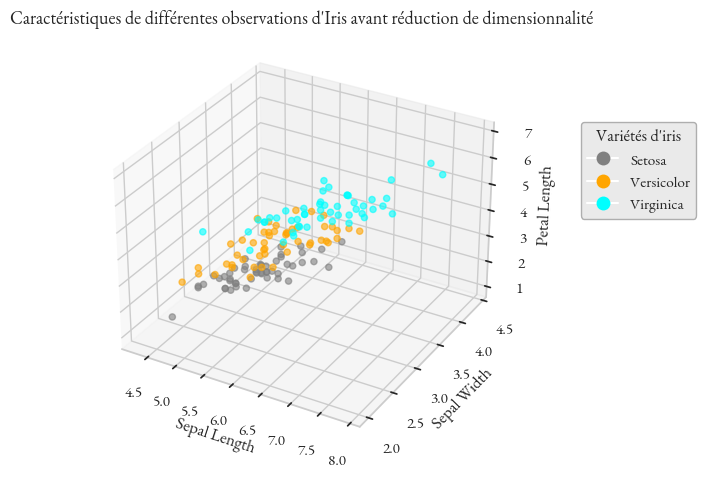

In [1744]:
# Création de la figure :
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Paramétrage du style du graphique :
sns.set_style('whitegrid')

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Paramétrage des axes :
x = iris['sepal.length']                                        
y = iris['sepal.width']                                          
z = iris['petal.length'] 

# Création d'un dictionnaire de couleurs pour chaque variété :
dictionnaire_couleurs = {'Setosa': 'grey', 
                         'Versicolor': 'orange', 
                         'Virginica': 'cyan'}

# Création d'un tableau de couleurs correspondant aux variétés :
colors = varieties.map(dictionnaire_couleurs)

# Création du nuage de points :
ax.scatter(x,
           y, 
           z,  
           marker = 'o',
           c = colors,
           alpha = 0.6)

# Création des handles pour la légende :
handles = [plt.Line2D([0], 
                      [0], 
                      marker = 'o',
                      color = 'w',
                      markerfacecolor = dictionnaire_couleurs[variety],
                      markersize = 10,
                      label = variety) 
           for variety in dictionnaire_couleurs]

# Ajout de la légende avec fond grisé directement dans cette partie :
legend = ax.legend(handles = handles,
                   title = "Variétés d'iris",
                   bbox_to_anchor = (1.45, 0.8),
                   fancybox = True,
                   frameon = True,             
                   framealpha = 0.6,             
                   facecolor = 'gainsboro',
                   edgecolor = 'grey') 

# Personnalisation des axes :
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Ajout du titre :
ax.set_title("Caractéristiques de différentes observations d'Iris avant réduction de dimensionnalité", 
             fontsize = 13,
             pad = 5)

# Affichage du nuage de points :
plt.show()

### 2. Représentation des données 'Iris' après réduction de dimensionnalité ###

##### _a. Centrage et réduction des données_ #####

In [1635]:
# Centrage et réduction des données :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_num)

In [1636]:
# Transformation de X_scaled en dataframe :
iris_scaled = pd.DataFrame(X_scaled, 
                           columns = iris_num.columns)
iris_scaled.round(2).head(3)

,sepal.length,sepal.width,petal.length,petal.width
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32


In [1637]:
# Affichage du type d'objet :
print(type(iris_scaled))

<class 'pandas.core.frame.DataFrame'>


In [1638]:
# Vérification de la moyenne pour chaque colonne : 
print("La moyenne pour chaque colonne d'iris_scaled est la suivante : ")
print(iris_scaled.mean().round(2))

La moyenne pour chaque colonne d'iris_scaled est la suivante : 
sepal.length   -0.0
sepal.width    -0.0
petal.length   -0.0
petal.width    -0.0
dtype: float64


In [1639]:
# Vérification de l'écart-type pour chaque colonne : 
print("L'écart-type pour chaque colonne d'iris_scaled est le suivant :")
print(iris_scaled.std().round(2))

L'écart-type pour chaque colonne d'iris_scaled est le suivant :
sepal.length    1.0
sepal.width     1.0
petal.length    1.0
petal.width     1.0
dtype: float64


##### _b. Visualisation des données centrées-réduites (dataset iris)_ #####

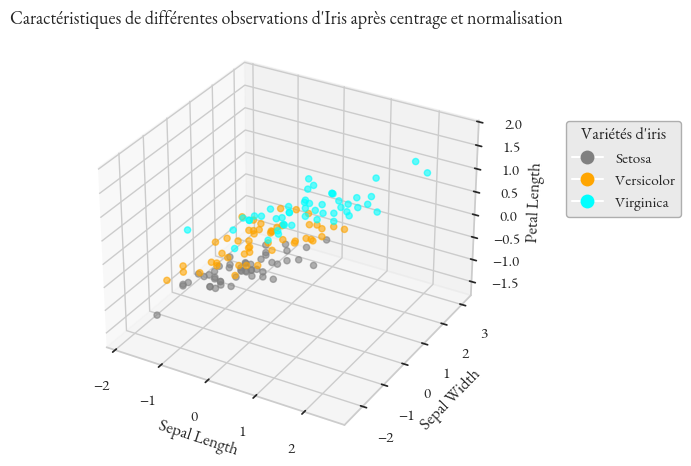

In [1640]:
# Création de la figure :
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Paramétrage du style du graphique :
sns.set_style('whitegrid')

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du nuage de points avec les nouvelles dimensions :
ax.scatter(iris_scaled.iloc[:, 0], 
           iris_scaled.iloc[:, 1], 
           iris_scaled.iloc[:, 2],  
           marker = 'o',
           c = colors,
           alpha = 0.6)

# Ajout de la légende :
ax.legend(handles = handles,
          title = "Variétés d'iris",
          bbox_to_anchor = (1.45, 0.8),
          fancybox = True,
          frameon = True,             
          framealpha = 0.6,             
          facecolor = 'gainsboro',
          edgecolor = 'grey') 

# Personnalisation des axes :
ax.set_xlabel('Sepal Length', labelpad = 6)
ax.set_ylabel('Sepal Width', labelpad = 6)
ax.set_zlabel('Petal Length', labelpad = 6)

# Ajout du titre :
ax.set_title("Caractéristiques de différentes observations d'Iris après centrage et normalisation", 
             fontsize = 13,
             pad = 0) 

# Affichage du nuage de points :
plt.show()

### 3. Représentation des données 'Iris' après ACP  ###

##### _a. Sans standardisation_ #####

In [1641]:
# Création de l'objet PCA à deux composantes :
model = PCA()

# Application de la méthode fit_transform du modèle aux données iris : 
pca_features = model.fit_transform(iris_num)                                        # les données iris_num n'ont pas été standardisées

# Assignation de la colonne 0 de pca_features à xs_brut :
xs_brut = pca_features[:, 0]

# Assignation de la colonne 1 de pca_features à ys_brut :
ys_brut = pca_features[:,1]

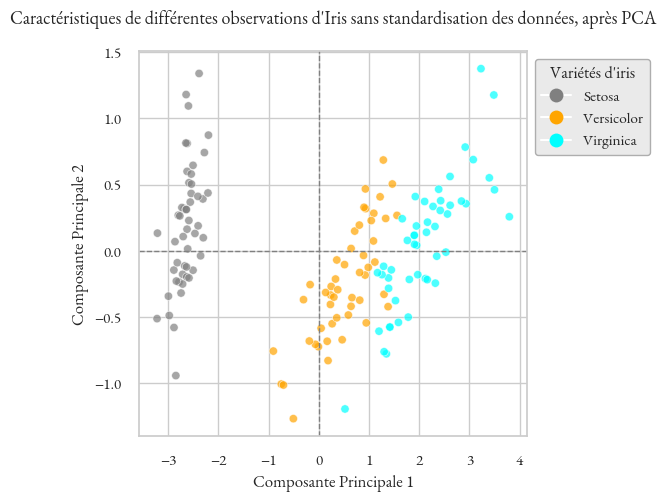

In [1642]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (5, 5))

# Paramétrage du style du graphique :
sns.set_style('darkgrid')

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du scatter plot xs vs ys :
sns.scatterplot(data = iris_num,
                x = xs_brut, 
                y = ys_brut,
                hue = varieties,
                palette = dictionnaire_couleurs, 
                alpha = 0.7)

# Ajout d'un titre à la visualisation :
plt.title("Caractéristiques de différentes observations d'Iris sans standardisation des données, après PCA",
          fontsize = 13,
          pad = 20)

# Ajout des titres aux axes X et Y :
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')

# Ajout d'une ligne verticale à x = 0 (composante principale 1):
plt.axvline(x = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Ajout d'une ligne horizontale à y = 0 (composante principale 2):
plt.axhline(y = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Création des handles pour la légende :
handles = [plt.Line2D([0], 
                      [0], 
                      marker = 'o',
                      color = 'w',
                      markerfacecolor = dictionnaire_couleurs[variety],
                      markersize = 10,
                      label = variety) 
           for variety in dictionnaire_couleurs]

# Ajout de la légende :
plt.legend(handles = handles,
           title = "Variétés d'iris",
           bbox_to_anchor = (1, 1),
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey') 

# Ajustement automatique des limites des axes :
ax.autoscale()

# Affichage du graphique :
plt.show()

##### _b. Avec standardisation_ #####

In [1643]:
# Création de l'objet PCA :
pca = PCA()

In [1644]:
# Application de la méthode fit_transform du modèle aux données iris : 
iris_pca = pca.fit_transform(iris_scaled)             # les données iris_scaled ont été standardisées

In [1645]:
# Conversion de l'object en dataframe : 
iris_pca_df = pd.DataFrame(data = iris_pca,
                           columns = ['CP 1', 
                                      'CP 2', 
                                      'CP 3', 
                                      'CP 4'])

iris_pca_df.round(2).head(3)

,CP 1,CP 2,CP 3,CP 4
0,-2.26,0.48,0.13,-0.02
1,-2.08,-0.67,0.23,-0.10
2,-2.36,-0.34,-0.04,-0.03


In [1646]:
# Assignation de la colonne 'CP 1' de iris_pca_df à xs :
xs = iris_pca_df['CP 1']

# Assignation de la colonne 'CP 2' de iris_pca_df à ys :
ys = iris_pca_df['CP 2']

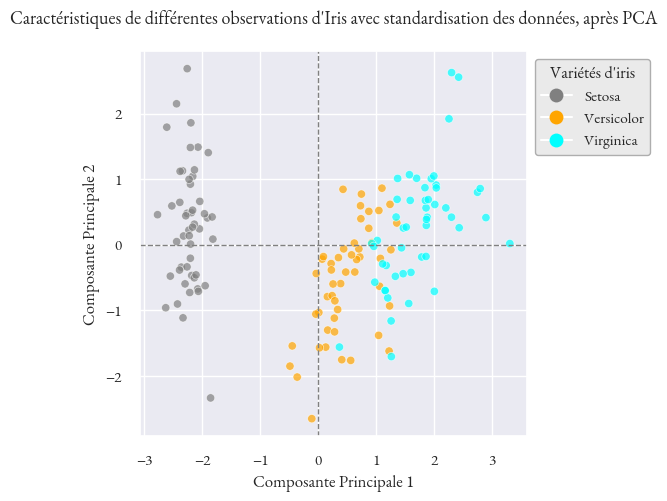

In [1647]:
# Création de la figure :
fig, ax = plt.subplots(figsize =(5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du scatter plot xs vs ys :
sns.scatterplot(x = xs, 
                y = ys,
                data = iris_pca_df,
                c = colors,
                alpha = 0.7)

# Ajout d'un titre à la visualisation :
plt.title("Caractéristiques de différentes observations d'Iris avec standardisation des données, après PCA",
          fontsize = 13,
          pad = 20)

# Ajout des titres aux axes X et Y  :
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')

# Ajout d'une ligne verticale à x = 0 :
plt.axvline(x = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Ajout d'une ligne verticale à y = 0 :
plt.axhline(y = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Ajout de la légende :
plt.legend(handles = handles,
          title = "Variétés d'iris",
          bbox_to_anchor = (1, 1),
          fancybox = True,
          frameon = True,             
          framealpha = 0.6,             
          facecolor = 'gainsboro',
          edgecolor = 'grey') 

# Ajustement automatiquement les limites des axes :
ax.autoscale()

# Affichage du graphique :
plt.show()

### 4. Corrélogramme ###

Text(0.5, 1.0, "Corrélations entre les différentes caractéristiques du jeu de données 'iris'")

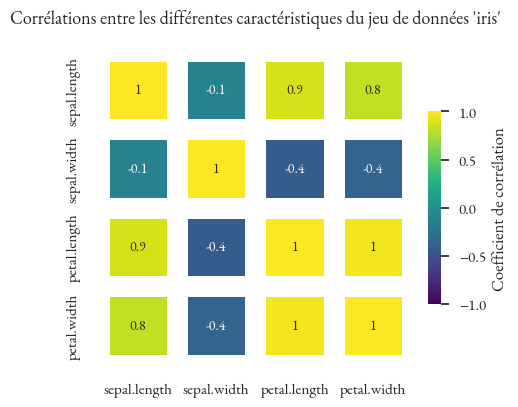

In [1648]:
# Définition de la taille de la figure :
plt.figure(figsize = (5, 5))

# Affichage du corrélogramme :
sns.heatmap(iris_num.corr(),
            annot = True,
            fmt = '.1g',
            vmin = -1, 
            vmax = 1,
            center = 0, 
            cmap = 'viridis',
            linewidths = 15,
            linecolor = 'white',
            square = True,
            cbar_kws = {"shrink": 0.5, 
                        "aspect": 15, 
                        "pad": 0.04,
                        "label": "Coefficient de corrélation"})

# Ajout du titre :
plt.title("Corrélations entre les différentes caractéristiques du jeu de données 'iris'",
          pad = 20,
          fontsize = 13)

In [1649]:
# Les données les plus corrélées sont :
# - petal.width x petal.length (coefficient 1)
# - petal.width x sepal.length (coefficient 0.8)
# - petal.length x sepal.length (ceofficient 0.9)
# Les valeurs des corrélations sont proches de 1.

### 5. Cercle des corrélations ###

In [1650]:
# Sélection des deux premières composantes et des variables :
loadings = pd.DataFrame(data = pca.components_.T[:, :2],  
                        columns = ['CP 1', 'CP 2'],
                        index = caracteristiques)
loadings.round(2)

,CP 1,CP 2
sepal.length,0.52,0.38
sepal.width,-0.27,0.92
petal.length,0.58,0.02
petal.width,0.56,0.07


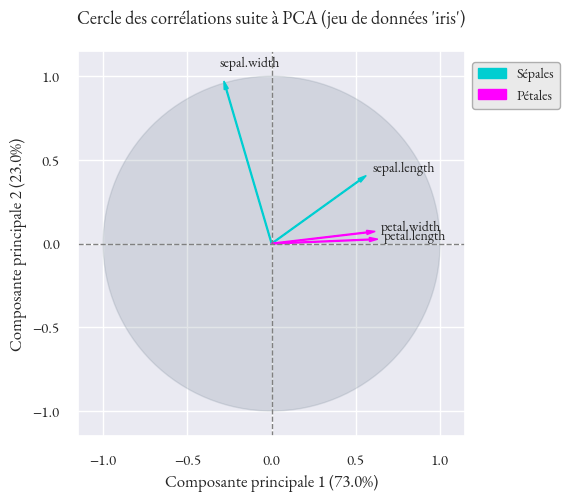

In [1651]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du cercle :
cercle = plt.Circle((0, 0),
                     1, 
                     fill = True,
                     color = 'slategrey',
                     alpha = 0.2)    
plt.gca().add_artist(cercle)                            

# Ajout des vecteurs et de leurs étiquettes :
for i in loadings.index:                                       
    if 'sepal' in i:
        color = 'darkturquoise'  
    else:
        color = 'fuchsia'       

    # Tracé des flèches représentant les vecteurs de charge
    plt.arrow(0, 
              0,                                        
              loadings.loc[i, 'CP 1'], 
              loadings.loc[i, 'CP 2'],
              head_width = 0.025, 
              head_length = 0.05,
              width = 0.005,
              color = color)
    
    # Ajout du texte pour étiqueter les vecteurs
    plt.text(loadings.loc[i, 'CP 1'] * 1.15,                   
             loadings.loc[i, 'CP 2'] * 1.15,
             i)

# Calcul des pourcentages de variance :
variance_cp1 = pca.explained_variance_ratio_[0].round(2) * 100   # Variance pour CP1   
variance_cp2 = pca.explained_variance_ratio_[1].round(2) * 100   # Variance pour CP2 

# Ajout des étiquettes aux axes des x et des y avec pourcentages de variance :
plt.xlabel(f'Composante principale 1 ({variance_cp1}%)')   # Étiquette pour CP1                               
plt.ylabel(f'Composante principale 2 ({variance_cp2}%)')   # Étiquette pour CP2

# Ajout du titre au graphique :
plt.title("Cercle des corrélations suite à PCA (jeu de données 'iris')",
          pad = 20,
          fontsize = '13')

# Ajustement des limites des axes :
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)

# Ajout de ligne horizontale (composante principale 1):
plt.axhline(0, 
            color = 'grey',
            linewidth = 1,
            linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
plt.axvline(0, 
            color = 'grey',
            linewidth = 1,
            linestyle = '--')

# Création des patches pour la légende :
sepal_patch = mpatches.Patch(color = 'darkturquoise', 
                             label = 'Sépales')         # Patch pour sépales
petal_patch = mpatches.Patch(color = 'fuchsia', 
                             label = 'Pétales')         # Patch pour pétales

# Ajout de la légende avec les patches :
plt.legend(handles = [sepal_patch, 
                      petal_patch],  
                      fontsize = 10,
                      bbox_to_anchor = [1, 0.99],
                      fancybox = True,
                      frameon = True,             
                      framealpha = 0.6,             
                      facecolor = 'gainsboro',
                      edgecolor = 'grey') 

# Affichage du graphique :
plt.show() 

##### _Les vecteurs représentant des variables proches l'un de l'autre et pointant dans la même direction indiquent une forte corrélation positive entre ces variables. C'est le cas notamment pour petal.length et petal.width (fortement corrélées) et pour sepal.length également corrélé aux autres variables._ #####

### 6. Biplot ###

In [1652]:
# Collecte des coordonnées des vecteurs :
components = pca.components_
print(components)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


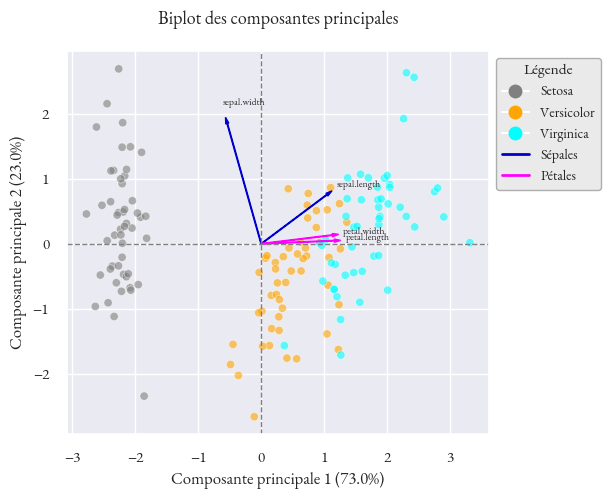

In [1653]:
# Création de la figure et des axes :
fig, ax = plt.subplots(figsize = (5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 7

# Création des handles pour la légende des points :
handles = [plt.Line2D([0], 
                      [0], 
                      marker = 'o',
                      color = 'w',
                      markerfacecolor = dictionnaire_couleurs[variety],
                      markersize = 10,
                      label = variety) 
           for variety in dictionnaire_couleurs]

# Création du scatter plot xs vs ys avec seaborn :
scatter = sns.scatterplot(data = iris_pca_df,
                          x = xs,
                          y = ys,
                          c = colors,
                          alpha = 0.6)

# Création des handles pour les vecteurs représentant les sépales :
sepal_handle = plt.Line2D([0], 
                          [0], 
                          color = 'mediumblue', 
                          lw = 2, 
                          linestyle = '-',
                          label = 'Sépales')

# Création des handles pour les vecteurs représentant les pétales :
petal_handle = plt.Line2D([0], 
                          [0], 
                          color = 'fuchsia', 
                          lw = 2, 
                          linestyle = '-', 
                          label = 'Pétales')

# Ajout des vecteurs et de leurs étiquettes :
for i in loadings.index:                                       
    if 'sepal' in i:
        color = 'mediumblue'
    else:
        color = 'fuchsia'    

    # Définition du facteur d'échelle pour agrandir les vecteurs :
    scaling_factor = 2        

    # Dessin de la flèche pour représenter le vecteur :
    plt.arrow(0, 
              0,
              loadings.loc[i, 'CP 1'] * scaling_factor,
              loadings.loc[i, 'CP 2'] * scaling_factor,                                   
              head_width = 0.025 * scaling_factor, 
              head_length = 0.05 * scaling_factor,
              width = 0.005 * scaling_factor,
              color = color)
    
    # Ajout du texte avec le nom du vecteur à proximité de la flèche :
    plt.text(loadings.loc[i, 'CP 1'] * scaling_factor * 1.15,
             loadings.loc[i, 'CP 2'] * scaling_factor * 1.15, 
             i)

# Ajout des handles des vecteurs aux handles existants :
handles += [sepal_handle, petal_handle]

# Collecte des pourcentages de variance :
variance_cp1 = pca.explained_variance_ratio_[0].round(2) * 100
variance_cp2 = pca.explained_variance_ratio_[1].round(2) * 100

# Ajout des étiquettes aux axes des x et des y avec pourcentages de variance :
plt.xlabel(f'Composante principale 1 ({variance_cp1}%)')                                      
plt.ylabel(f'Composante principale 2 ({variance_cp2}%)')

# Personnalisation du titre :
plt.title('Biplot des composantes principales',
          pad = 20,
          fontsize = 13)

# Modification des limites des axes :
plt.tight_layout()

# Personnalisation de la légende :
plt.legend(handles = handles,
           title = "Légende",  
           title_fontsize = '11', 
           fontsize = '10',
           bbox_to_anchor = [1, 1],
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey') 

# Ajout d'une ligne verticale (composante principale 1) :
plt.axvline(x = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Ajout d'une ligne horizontale (composante principale 2) :
plt.axhline(y = 0, 
            color = 'grey', 
            linestyle = '--', 
            linewidth = 1)

# Affichage du tracé :
plt.show()

##### _La part de variance représentée est de 73 + 23 = 96 % de la variance expliquée totale, ce qui indique une bonne représentativité des données initiales._ #####

### 7. Scree plot ###

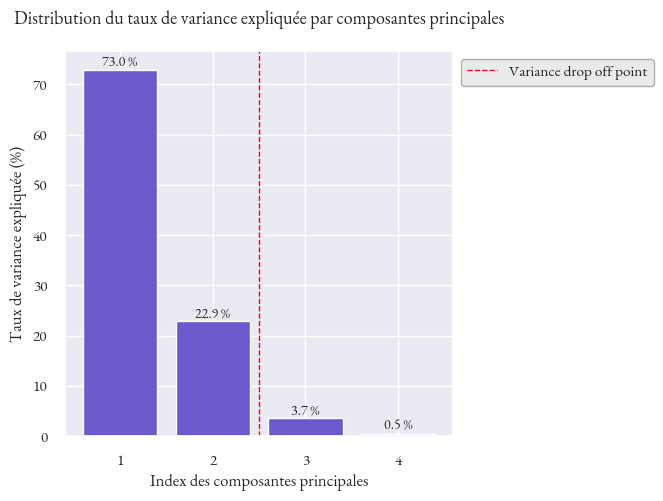

In [1654]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# # Obtention des caractéristiques des composantes principales :
features = range(pca.n_components_)

# Tracé du graphique à barres :
bars = plt.bar(features, 
               pca.explained_variance_ratio_*100,
               color = 'slateblue', 
               edgecolor = 'white')

# Définition des nouvelles graduations pour l'axe x :
plt.xticks(ticks = features, 
           labels = [f'{i+1}' for i in features])

# Ajout des labels et un titre :
plt.xlabel('Index des composantes principales')
plt.ylabel('Taux de variance expliquée (%)')
plt.title('Distribution du taux de variance expliquée par composantes principales',
          pad = 20,
          fontsize = 13)

# Ajout des labels au-dessus des barres :
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval, 
             f'{yval:.1f} %', 
             ha = 'center', 
             va = 'bottom')
    
# Ajout d'une ligne verticale entre les composantes 2 et 3 :
plt.axvline(x = 1.5,
            color = 'red',
            linestyle = '--',
            linewidth = 1,
            label = 'Variance drop off point')

# Ajout de la légende :
plt.legend(bbox_to_anchor = [1, 1],
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey') 

# Affichage du graphique :
plt.show()

##### _Le nombre de composantes principales à retenir est de deux._ #####

### 8. Scree plot avec taux de variance cumulés ###

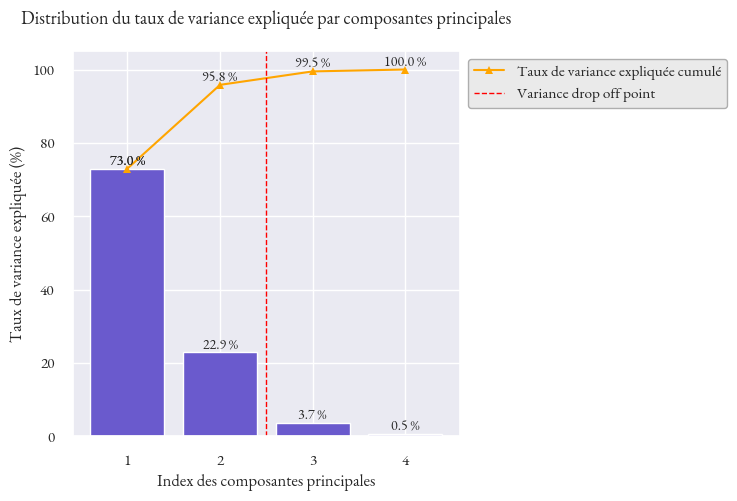

In [1655]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Obtention des caractéristiques des composantes principales :
features = range(pca.n_components_)

# Tracé du graphique à barres :
bars = plt.bar(features, 
               pca.explained_variance_ratio_*100,
               color = 'slateblue', 
               edgecolor = 'white')

# Définition des nouvelles graduations pour l'axe x :
plt.xticks(ticks = features, 
           labels = [f'{i+1}' for i in features])

# Ajout des étiquettes des axes :
plt.xlabel('Index des composantes principales')
plt.ylabel('Taux de variance expliquée (%)')

# Ajout du titre :
plt.title('Distribution du taux de variance expliquée par composantes principales',
          pad = 20,
          fontsize = 13)

# Ajout des labels au-dessus des barres :
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval, 
             f'{yval:.1f} %', 
             ha = 'center', 
             va = 'bottom')

# Ajout de la courbe :
variance_expl = pca.explained_variance_ratio_.cumsum()*100
plt.plot(variance_expl,
         marker = '^',
         color = 'orange',
         label = 'Taux de variance expliquée cumulé' )

# Ajout des valeurs au niveau des points de la courbe :
for i, value in enumerate(variance_expl):
    plt.text(features[i], 
             value, 
             f'{value:.1f} %', 
             ha = 'center', 
             va = 'bottom')

# Ajout d'une ligne verticale entre les composantes 2 et 3 :
plt.axvline(x = 1.5,
            color = 'red',
            linestyle = '--',
            linewidth = 1,
            label = 'Variance drop off point')

# Ajout de la légende :
plt.legend(bbox_to_anchor = [1, 1],
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey') 

# Affichage du graphique :
plt.show()

### 9. Table des eigenvalues et variances expliquées associées ###

In [1656]:
# Calcul des valeurs propres (eigenvalues) :
eigenvalues = pca.explained_variance_

# Calcul de la variance expliquée :
variance_explained = eigenvalues / eigenvalues.sum()

# Calcul de la variance cumulée :
cumulative_variance = variance_explained.cumsum()

# Création du DataFrame avec la variance expliquée :
table = pd.DataFrame({'Composante': np.arange(1, len(eigenvalues) + 1),
                      'Eigenvalues': eigenvalues.round(2),
                      'Variance expliquée (%)': (variance_explained * 100).round(2),
                      'Variance cumulée (%)': (cumulative_variance * 100).round(2)})

# Affichage du dataframe 'table' :
table

,Composante,Eigenvalues,Variance expliquée (%),Variance cumulée (%)
0,1,2.94,72.96,72.96
1,2,0.92,22.85,95.81
2,3,0.15,3.67,99.48
3,4,0.02,0.52,100.00


##### _Il semble exister un lien de proportionnalité entre les eigenvalues et la variance expliquée (de l'ordre de 24 ici)._ #####

### 10. Table des saturations ###

In [1657]:
# Calcul des charges des composants principaux :
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Création d'un DataFrame pour les charges :
loading_matrix = pd.DataFrame(loadings, 
                              columns = ['CP 1', 'CP 2', 'CP 3', 'CP 4'], 
                              index = caracteristiques)
loading_matrix.round(2)

,CP 1,CP 2,CP 3,CP 4
sepal.length,0.89,0.36,0.28,-0.04
sepal.width,-0.46,0.89,-0.09,0.02
petal.length,0.99,0.02,-0.05,0.12
petal.width,0.97,0.06,-0.24,-0.08


##### _Pour la CP 1, la variable qui représente la saturation la plus forte est 'petal.length'. Sur le cercle des corrélations, on peut voir que le vecteur de cette variable est presque superposée avec l'axe de la 'CP 1'._ #####

### 11. Variable avec saturation maximale pour chaque composante principale ###

In [1658]:
# Identification de la variable avec la plus forte saturation pour chaque composante : 
max_saturations = loading_matrix.abs().idxmax()

# Création du tableau des saturations maximales :
saturation_table = pd.DataFrame({'Composante': max_saturations.index,
                                 'Variable avec saturation maximale': max_saturations.values})
saturation_table

,Composante,Variable avec saturation maximale
0,CP 1,petal.length
1,CP 2,sepal.width
2,CP 3,sepal.length
3,CP 4,petal.length


### 12. Lien entre saturation des variables et orientation des vecteurs ###

##### _Une flèche orientée dans la même direction qu'une composante principale indique une corrélation positive avec cette composante. À l'inverse, une flèche orientée dans la direction opposée révèle une corrélation négative. Sur le cercle des corrélations, une flèche qui se rapproche ou se superpose à l'axe de la composante principale illustre une forte corrélation entre la variable et la composante principale (saturation proche de 1)._ #####

### 13. Qualité de représentation des variables ###

##### _La qualité de représentation d'une variable par une Analyse en Composantes Principales (ACP) se réfère à la manière dont une variable est bien expliquée par les composantes principales retenues. Cela permet d'évaluer à quel point les nouvelles variables issues de l'ACP (les composantes principales) capturent l'information initiale contenue dans les variables d'origine._ #####

##### **Cos²** 
##### _Correspond à la qualité de représentation des variables sur le graphique de l’ACP. Un cos2 élevé indique une bonne représentation de la variable sur les axes principaux en considération._ #####

##### **Contribution** #####
##### _La contribution donne les participations des variables à la construction des composantes de l’ACP. Ces contributions sont données en pourcentage et permettent de repérer les variables les plus importantes au niveau de chaque composante._ #####

##### _a. COS2_ #####

In [1659]:
# Calcul des cos² pour chaque composante principale :
cos2_matrix = loading_matrix[['CP 1', 'CP 2']] ** 2

# Calcul de la communalité (somme des cos²) sur CP 1 et CP 2 :
cos2_matrix['Communalité'] = cos2_matrix.sum(axis = 1)

# Changement des noms de colonnes pour afficher '(cos²)' dans les entêtes :
cos2_matrix.rename(columns = {'CP 1': 'CP 1', 'CP 2': 'CP 2'}, 
                   inplace = True)

# Affichage du tableau avec les nouvelles colonnes :
cos2_matrix.round(2)

,CP 1,CP 2,Communalité
sepal.length,0.80,0.13,0.93
sepal.width,0.21,0.78,1.00
petal.length,0.99,0.00,0.99
petal.width,0.94,0.00,0.94


In [1660]:
# Création d'un objet de normalisation pour les valeurs de cos² :
norm = plt.Normalize(cos2_matrix['Communalité'].min(), 
                     cos2_matrix['Communalité'].max())

# Utilisation de la normalisation pour créer une carte de couleurs :
cmap = cm.ScalarMappable(norm = norm, 
                         cmap = 'RdYlGn')

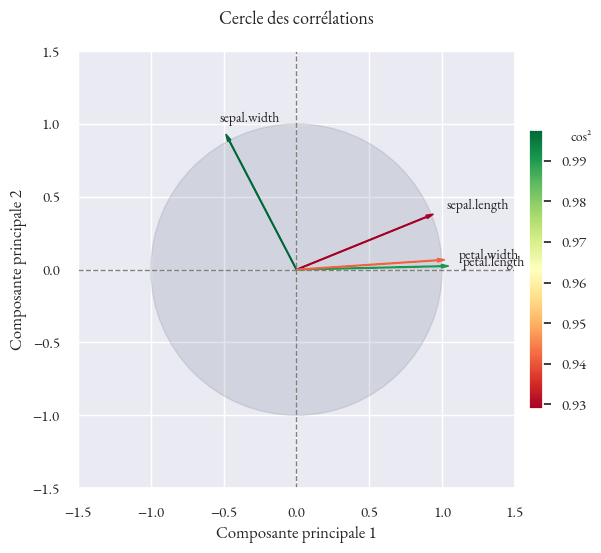

In [1661]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (6, 6))

# Création du cercle :
cercle = plt.Circle((0, 0),
                     1,
                     fill = True,
                     color = 'slategrey',
                     alpha = 0.2)    
ax.add_artist(cercle)

# Ajout des vecteurs et de leurs étiquettes :
for i in cos2_matrix.index:
    vector_color = cmap.to_rgba(cos2_matrix.loc[i, 'Communalité'])

    # Dessin d'une flèche pour représenter le vecteur :
    ax.arrow(0,
             0,
             loading_matrix.loc[i, 'CP 1'],
             loading_matrix.loc[i, 'CP 2'],
             head_width = 0.025,
             head_length = 0.05,
             width = 0.005,
             color = vector_color)
    
    # Ajout de l'étiquette du vecteur à proximité de la flèche :
    ax.text(loading_matrix.loc[i, 'CP 1'] * 1.15,
            loading_matrix.loc[i, 'CP 2'] * 1.15,
            i)

# Ajout des étiquettes aux axes des x et des y :
ax.set_xlabel('Composante principale 1')                                      
ax.set_ylabel('Composante principale 2')

# Ajout du titre au graphique :
ax.set_title('Cercle des corrélations',
          pad = 20,
          fontsize = '13')

# Ajustement des limites des axes :
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal') 

# Ajout de ligne horizontale (composante principale 1):
ax.axhline(0,
           color = 'grey',
           linewidth = 1,
           linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
ax.axvline(0, 
           color = 'grey',
           linewidth = 1,
           linestyle = '--')

# Ajout de la barre de couleur :
cbar = plt.colorbar(cmap,
                    ax = ax,
                    fraction = 0.03,
                    pad = 0.03)

# Affichage du titre au-dessus de la Colorbar :
cbar.set_label('cos²', 
               rotation = 0, 
               fontsize = 10, 
               loc = 'top')

# Affichage du graphique :
plt.show()

##### _b. Contributions_ #####

In [1662]:
# Contribution de chaque variable à chaque composante principale :
contributions = (cos2_matrix[['CP 1', 'CP 2']].div(cos2_matrix[['CP 1', 'CP 2']].sum(axis = 0), axis = 1)) * 100

# Affichage du tableau des contributions des variables :
print("\nContributions des variables aux différentes composantes principales (en %) :")
contributions.round(2)


Contributions des variables aux différentes composantes principales (en %) :


,CP 1,CP 2
sepal.length,27.15,14.24
sepal.width,7.25,85.25
petal.length,33.69,0.06
petal.width,31.91,0.45


In [1663]:
# Normalisation des valeurs de CP1 pour la palette de couleurs :
norm_cp1 = mcolors.Normalize(vmin = contributions['CP 1'].min(), 
                             vmax = contributions['CP 1'].max())

cmap_cp1 = cm.ScalarMappable(norm = norm_cp1, 
                             cmap = 'RdYlGn')

# Normalisation des valeurs de CP2 pour la palette de couleurs :
norm_cp2 = mcolors.Normalize(vmin = contributions['CP 2'].min(), 
                             vmax = contributions['CP 2'].max())

cmap_cp2 = cm.ScalarMappable(norm = norm_cp2, 
                             cmap = 'RdYlGn')

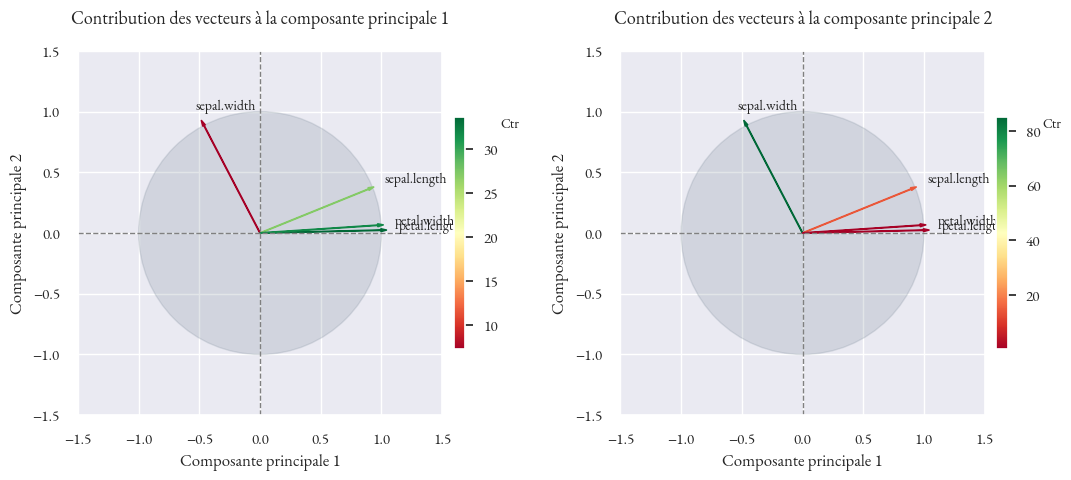

In [1664]:
# Création de la figure avec deux subplots :
fig, (ax1, ax2) = plt.subplots(1, 
                               2, 
                               figsize = (12, 6))

# ----------------- Premier subplot (subplot de gauche) ----------------- #

# Création du cercle sur le subplot de gauche :
cercle1 = plt.Circle((0, 0), 
                     1, 
                     fill = True, 
                     color = 'slategrey', 
                     alpha = 0.2)

ax1.add_artist(cercle1)

# Ajout des vecteurs et de leurs étiquettes au subplot de gauche :
for i in contributions.index:
    vector_color = cmap_cp1.to_rgba(contributions.loc[i, 'CP 1'])

    # Dessin d'une flèche pour représenter le vecteur :
    ax1.arrow(0,
              0,
              loading_matrix.loc[i, 'CP 1'],
              loading_matrix.loc[i, 'CP 2'],
              head_width = 0.025,
              head_length = 0.05,
              width = 0.005,
              color = vector_color)
    
    # Ajout de l'étiquette du vecteur à proximité de la flèche :
    ax1.text(loading_matrix.loc[i, 'CP 1'] * 1.15,
             loading_matrix.loc[i, 'CP 2'] * 1.15,
             i)

# Ajout des étiquettes des axes au subplot de gauche :
ax1.set_xlabel('Composante principale 1')
ax1.set_ylabel('Composante principale 2')

# Ajout du titre au subplot de gauche :
ax1.set_title('Contribution des vecteurs à la composante principale 1', 
              pad = 20, 
              fontsize = 13)

# Ajustement des limites des axes :
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal')

# Ajout de ligne horizontale (composante principale 1) :
ax1.axhline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# # Ajout de ligne verticale (composante principale 2):
ax1.axvline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# ----------------- Deuxième subplot : Contributions sur l'axe CP2 ----------------- #

# Création du cercle :
cercle2 = plt.Circle((0, 0), 
                     1, 
                     fill = True, 
                     color = 'slategrey', 
                     alpha = 0.2)
ax2.add_artist(cercle2)

# Ajout des vecteurs et de leurs étiquettes :
for i in contributions.index:
    vector_color = cmap_cp2.to_rgba(contributions.loc[i, 'CP 2'])
    ax2.arrow(0,
              0,
              loading_matrix.loc[i, 'CP 1'],
              loading_matrix.loc[i, 'CP 2'],
              head_width = 0.025,
              head_length = 0.05,
              width = 0.005,
              color = vector_color)
    ax2.text(loading_matrix.loc[i, 'CP 1'] * 1.15,
             loading_matrix.loc[i, 'CP 2'] * 1.15,
             i)

# Ajout des étiquettes des axes au subplot de droite :
ax2.set_xlabel('Composante principale 1')
ax2.set_ylabel('Composante principale 2')

# Ajout du titre au subplot de droite :
ax2.set_title('Contribution des vecteurs à la composante principale 2', 
              pad = 20, 
              fontsize = 13)

# Ajustement des limites des axes :
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')  

# Ajout de ligne horizontale (composante principale 1):
ax2.axhline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
ax2.axvline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Création d'une barre de couleur pour le subplot de gauche :
cbar_cp1 = plt.colorbar(cmap_cp1, 
                        ax = ax1, 
                        fraction = 0.03, 
                        pad = 0.03)
cbar_cp1.set_label('Ctr', 
                   rotation = 0,
                   fontsize = 10, 
                   labelpad = 15,
                   loc = 'top')

# Création d'une barre de couleur pour le subplot de droite :
cbar_cp2 = plt.colorbar(cmap_cp2, 
                        ax = ax2, 
                        fraction = 0.03, 
                        pad = 0.03)
cbar_cp2.set_label('Ctr', 
                   rotation = 0,
                   fontsize = 10, 
                   labelpad = 15,
                   loc = 'top')

# Ajustement de l'espace entre les subplots :
plt.subplots_adjust(wspace = 0.4)

# Affichage de la figure :
plt.show()

##### **Les principales différences entre les cos2 et les contributions sont :** #####
##### _cos 2 : Utilisé pour évaluer la qualité de la projection des variables sur les composantes principales._ #####
##### _Contributions : Utilisé pour comprendre l'importance relative des variables dans la formation des composantes principales._ #####

### 14. Qualité de représentation des individus ###

##### _a. COS2_ #####

In [1665]:
# Création d'une copie du DataFrame iris_pca_df :
iris_pca_df_cos2 = iris_pca_df.copy()

# Calcul du cos² pour chaque composante principale :
iris_pca_df_cos2['CP 1 (cos²)'] = iris_pca_df_cos2['CP 1'] ** 2
iris_pca_df_cos2['CP 2 (cos²)'] = iris_pca_df_cos2['CP 2'] ** 2

# Calcul de la communalité :
iris_pca_df_cos2['Communalité'] = iris_pca_df_cos2[['CP 1 (cos²)', 'CP 2 (cos²)']].sum(axis=1)

# Affichage du DataFrame avec la nouvelle colonne :
iris_pca_df_cos2.round(2).head(3)

,CP 1,CP 2,CP 3,CP 4,CP 1 (cos²),CP 2 (cos²),Communalité
0,-2.26,0.48,0.13,-0.02,5.13,0.23,5.36
1,-2.08,-0.67,0.23,-0.10,4.33,0.45,4.78
2,-2.36,-0.34,-0.04,-0.03,5.59,0.12,5.71


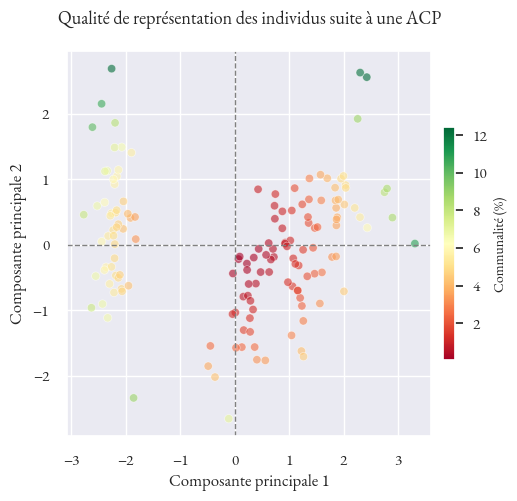

In [1666]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (5, 5))

# Normalisation des valeurs de la communalité pour la palette de couleurs :
norm = mcolors.Normalize(vmin = iris_pca_df_cos2['Communalité'].min(), 
                         vmax = iris_pca_df_cos2['Communalité'].max())

# Choix d'une palette de couleurs :
cmap = plt.get_cmap('RdYlGn')  

# Création du scatterplot :
scatter = sns.scatterplot(data = iris_pca_df_cos2,
                          x = 'CP 1',
                          y = 'CP 2',
                          hue = 'Communalité',
                          palette = cmap,
                          alpha = 0.6,
                          ax = ax,
                          legend = None)

# Ajout des étiquettes aux axes des x et des y :
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')

# Ajout du titre au graphique :
ax.set_title('Qualité de représentation des individus suite à une ACP',
             pad = 20,
             fontsize = 13)

# Ajustement des limites des axes :
plt.autoscale()

# Ajout de ligne horizontale (composante principale 1):
ax.axhline(0,
           color = 'grey',
           linewidth = 1,
           linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
ax.axvline(0,
           color = 'grey',
           linewidth = 1,
           linestyle = '--')

# Création d'un mappage de couleurs :
sm = plt.cm.ScalarMappable(cmap = cmap, 
                           norm = norm)

# Initialisation de l'array pour le mappage de couleurs :
sm.set_array([])

# Création de la barre de couleur
cbar = plt.colorbar(sm, 
                    ax = ax, 
                    fraction = 0.03, 
                    pad = 0.03)

# Définition du label de la colorbar :
cbar.set_label('Communalité (%)', 
               rotation = 90, 
               fontsize = 10, 
               loc = 'center')

# Affichage du graphique :
plt.show()

##### _b. Contributions_ #####

In [1667]:
# Calcul des contributions en pourcentages
contributions_individus = (iris_pca_df_cos2[['CP 1 (cos²)', 'CP 2 (cos²)']]
                            .div(iris_pca_df_cos2[['CP 1 (cos²)', 'CP 2 (cos²)']].sum(axis=0), axis=1) * 100)

# Renommer les colonnes
contributions_individus = contributions_individus.rename(columns={
    'CP 1 (cos²)': 'Contribution à CP 1',
    'CP 2 (cos²)': 'Contribution à CP 2'
})

# Affichage du tableau des contributions des individus
print("\nContributions des individus aux différentes composantes principales en pourcentages :")
contributions_individus.round(2).head(3)


Contributions des individus aux différentes composantes principales en pourcentages :


,Contribution à CP 1,Contribution à CP 2
0,1.17,0.17
1,0.99,0.33
2,1.28,0.09


In [1668]:
# Création d'un objet de normalisation pour les valeurs de CP 1 (cos²) :
norm_cp1 = mcolors.Normalize(vmin = contributions_individus['Contribution à CP 1'].min(), 
                             vmax = contributions_individus['Contribution à CP 2'].max())

# Création d'un ScalarMappable pour CP 1 avec la palette 'RdYlGn' :
cmap_cp1 = cm.ScalarMappable(norm = norm_cp1, 
                             cmap = 'RdYlGn')

# Création d'un objet de normalisation pour les valeurs de CP 2 (cos²) :
norm_cp2 = mcolors.Normalize(vmin = contributions_individus['Contribution à CP 1'].min(), 
                             vmax = contributions_individus['Contribution à CP 2'].max())

# Création d'un ScalarMappable pour CP 2 avec la palette 'RdYlGn' :
cmap_cp2 = cm.ScalarMappable(norm = norm_cp2, 
                             cmap = 'RdYlGn')

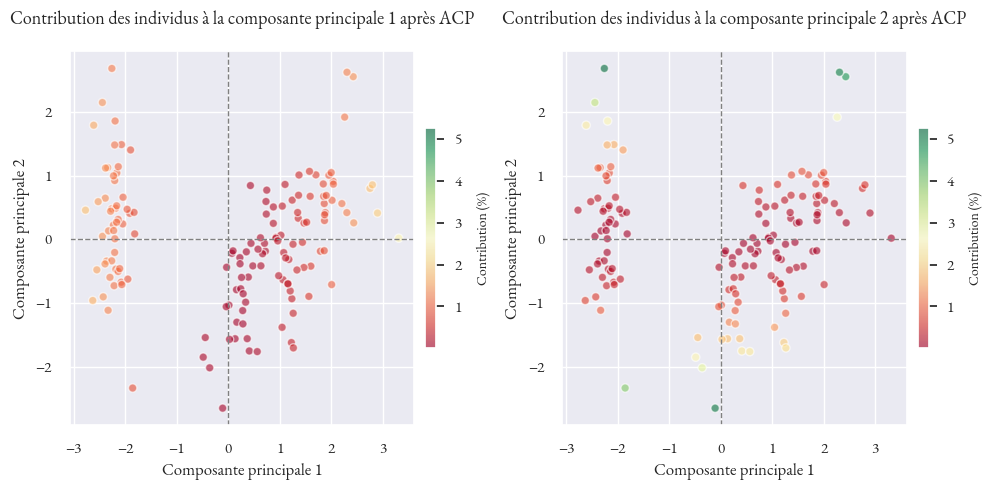

In [1669]:
# Création de la figure avec deux subplots :
fig, (ax1, ax2) = plt.subplots(1, 
                               2, 
                               figsize = (10, 5))

# ----------------- Premier subplot : Contributions sur l'axe CP1 ----------------- #

# Affichage des individus avec couleurs représentant les contributions à CP1 :
sc1 = ax1.scatter(iris_pca_df_cos2['CP 1'], 
                  iris_pca_df_cos2['CP 2'],
                  c = contributions_individus['Contribution à CP 1'],
                  cmap = 'RdYlGn',
                  norm = norm_cp1,
                  alpha = 0.6,
                  edgecolor = 'w')

# Ajout des étiquettes aux axes du premier subplot :
ax1.set_xlabel('Composante principale 1')
ax1.set_ylabel('Composante principale 2')

# Ajout du titre au premier subplot :
ax1.set_title('Contribution des individus à la composante principale 1 après ACP', 
              pad = 20, 
              fontsize = 13)

# Ajustement des limites des axes :
plt.autoscale()

# Ajout de ligne horizontale (composante principale 1):
ax1.axhline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
ax1.axvline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# ----------------- Deuxième subplot : Contributions sur l'axe CP2 ----------------- #

# Affichage des individus avec couleurs représentant les contributions à CP2 :
sc2 = ax2.scatter(iris_pca_df_cos2['CP 1'], 
                  iris_pca_df_cos2['CP 2'],
                  c = contributions_individus['Contribution à CP 2'],
                  cmap = 'RdYlGn',
                  norm = norm_cp2,
                  alpha = 0.6,
                  edgecolor = 'w')

# Ajout des étiquettes aux axes du deuxième subplot :
ax2.set_xlabel('Composante principale 1')
ax2.set_ylabel('Composante principale 2')

# Ajout du titre au deuxième subplot : 
ax2.set_title('Contribution des individus à la composante principale 2 après ACP', 
              pad = 20, 
              fontsize = 13)

# Ajustement des limites des axes :
plt.autoscale()

# Ajout de ligne horizontale (composante principale 1):
ax2.axhline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Ajout de ligne verticale (composante principale 2) :
ax2.axvline(0,
            color = 'grey',
            linewidth = 1,
            linestyle = '--')

# Ajout de la barre de couleur pour le premier subplot :
cbar_cp1 = plt.colorbar(sc1, 
                        ax = ax1, 
                        fraction = 0.03, 
                        pad = 0.03)

# Ajout du label pour la barre de couleur du premier subplot :
cbar_cp1.set_label('Contribution (%)', 
                   rotation = 90, 
                   fontsize = 10, 
                   labelpad = 10, 
                   loc = 'center')

# Ajout de la barre de couleur pour le deuxième subplot :
cbar_cp2 = plt.colorbar(sc2, 
                        ax = ax2, 
                        fraction = 0.03, 
                        pad = 0.03)

# Ajout du label pour la barre de couleur dy deuxième subplot :
cbar_cp2.set_label('Contribution (%)', 
                   rotation = 90, 
                   fontsize = 10, 
                   labelpad = 10, 
                   loc = 'center')

# Ajustement de l'espace entre les subplots :
plt.subplots_adjust(wspace = 0.4)

# Affichage de la figure :
plt.tight_layout()
plt.show()

### 15. Table des contributions des individus aux 2 composantes principales ###

In [1670]:
# Affichage de la table des contributions des individus aux deux composantes principales :
contributions_individus.round(2).head(3)

,Contribution à CP 1,Contribution à CP 2
0,1.17,0.17
1,0.99,0.33
2,1.28,0.09


##### _Plus la valeur de la contribution d'un individu est élevée, et plus l’individu contribue à la construction de l’axe de la composante principale en question._ #####



### 18. Algorithme kmeans ###

##### **L'algorithme K-means partitionne les données en K clusters en deux étapes répétées :** #####

##### _- Attribution des clusters : Chaque point est assigné au centroïde le plus proche._ #####
##### _- Recalculation des centroides : Les positions des centroides sont mises à jour en calculant la moyenne des points attribués à chaque cluster._ #####
##### _Les centroides se déplacent initialement de manière significative pour converger vers des positions stables, représentant les centres réels des clusters._ #####

##### **Étape d'Expectation :** #####
##### _Cette étape est axée sur l'attribution des points de données aux clusters. Elle consiste à évaluer la probabilité ou la distance pour déterminer l'affectation la plus appropriée des points à chaque cluster en utilisant les centroides actuels._ #####

##### **Étape de Maximisation :** #####
##### _Cette étape consiste à ajuster les centroides en maximisant la "qualité" de la partition obtenue dans l'étape d'Expectation. En recalculant les positions des centroides, on cherche à améliorer la précision des clusters en prenant en compte les points actuellement attribués à chaque cluster._ #####

### 19. Création des clusters avec kmeans ###

##### _a. Mise en oeuvre de la méthode K-Means_ #####

In [1671]:
# Sélection des 2 premières composantes principales :
iris_pca_df_2d = iris_pca_df[['CP 1', 'CP 2']].copy()
iris_pca_df_2d
print(iris_pca_df_2d.shape)

(150, 2)


In [1672]:
# Application de K-means sur les deux composantes principales :
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(iris_pca_df_2d)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [1673]:
# Ajout des clusters aux données originales :
iris_pca_df_2d.loc[:, 'cluster'] = clusters
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [1674]:
# Extraction des coordonnées des centroïdes :
centroides = kmeans.cluster_centers_
centroides.round(2)

array([[ 0.62, -0.8 ],
       [ 1.72,  0.65],
       [-2.22,  0.29]])

##### _b. Visualisation des clusters_ #####

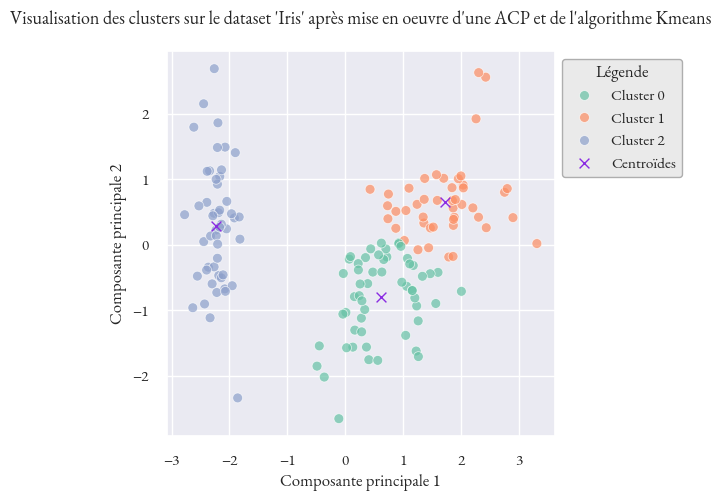

In [1675]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Tracé des individus avec une couleur par cluster :
sns.scatterplot(x = 'CP 1', 
                y = 'CP 2', 
                hue = 'cluster', 
                data = iris_pca_df_2d, 
                palette = 'Set2', 
                s = 50, 
                alpha = 0.7)

# Représentation des centroïdes :
plt.scatter(centroides[:, 0], 
            centroides[:, 1], 
            c = 'blueviolet', 
            s = 50, 
            marker = 'x', 
            label = 'Centroïdes',
            linewidths = 1)

# Ajout du titre au graphique :
plt.title("Visualisation des clusters sur le dataset 'Iris' après mise en oeuvre d'une ACP et de l'algorithme Kmeans",
          pad = 20,
          fontsize = 13)

# Modification des étiquettes des x et des y :
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Ajustement des axes au contenu du graphique :
plt.autoscale()

# Obtention des handles et labels de la légende :
handles, labels = plt.gca().get_legend_handles_labels()

# Remplacement des étiquettes des clusters :
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Ajout des labels des clusters aux handles :
new_handles = [handles[0]]
for i, label in enumerate(cluster_labels):
    new_handles.append(handles[i+1])

# Actualisation de la légende avec les nouveaux labels :
plt.legend(handles = new_handles,
           labels = cluster_labels + ['Centroïdes'],
           title = 'Légende',
           bbox_to_anchor = [1, 1],
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey') 

# Affichage du graphique :
plt.show()

##### _c. Obtention des proportions des différentes espèces représentées_ #####

In [1676]:
# Comptage des échantillons pour chaque cluster :
cluster_counts = iris_pca_df_2d['cluster'].value_counts()

# Obtention du nombre total d'échantillons dans le DataFrame :
total_samples = len(iris_pca_df_2d)

# Calcul des proportions de chaque cluster par rapport au total :
cluster_proportions = cluster_counts / total_samples

# Conversion des proportions en pourcentages :
cluster_proportions_percentage = cluster_proportions.round(2) * 100

# Rassemblement des clusters et de leurs proportions en pourcentage :
cluster_proportions_df = pd.DataFrame({
    'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3'],
    'Proportion (%)': cluster_proportions_percentage.sort_index().values
})
cluster_proportions_df

,Cluster,Proportion (%)
0,Cluster 1,37.0
1,Cluster 2,30.0
2,Cluster 3,33.0


##### _d. Obtention des moyennes de variables_ #####

In [1677]:
# Calcul de la moyenne des variables quantitatives pour chaque cluster :
mean_features_by_cluster = iris_pca_df_2d.groupby('cluster').mean()

# Changement du nom des indices des clusters :
mean_features_by_cluster.index = [f'Cluster {i}' for i in mean_features_by_cluster.index]

# Ajout du terme 'moyenne' avant les noms des colonnes CP 1 et CP 2 :
mean_features_by_cluster.columns = [f'Moyenne {col}' for col in mean_features_by_cluster.columns]
 
# Affichage des moyennes :
mean_features_by_cluster.round(2)

,Moyenne CP 1,Moyenne CP 2
Cluster 0,0.62,-0.80
Cluster 1,1.72,0.65
Cluster 2,-2.22,0.29


### 20. Nombre optimal de clusters ###

##### **Méthode du coude :** #####
##### _Elle évalue la quantité de variance capturée par chaque cluster pour déterminer le nombre optimal de clusters._ #####
##### **Méthode des silhouettes :** #####
##### _Elle mesure la proximité des points à leur propre cluster par rapport aux autres clusters pour évaluer la qualité de la séparation._ #####

##### _En utilisant deux méthodes, on peut obtenir une évaluation plus robuste de la qualité du clustering. Si les deux méthodes suggèrent le même nombre optimal de clusters, cela renforce la confiance dans ce choix. Si les résultats divergent, cela peut inciter à examiner les données plus en profondeur pour comprendre pourquoi._ #####

##### _a. Méthode du coude_ #####

In [1678]:
# Préparation de la liste pour stocker les sommes des carrés des erreurs :
inertias = []

# Définition des valeurs de k (nombre de clusters) à tester :
ks = range(1, 11)

# Calcul de la variance intra-cluster pour chaque nombre de clusters :
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(iris_pca_df_2d)
    inertias.append(model.inertia_)

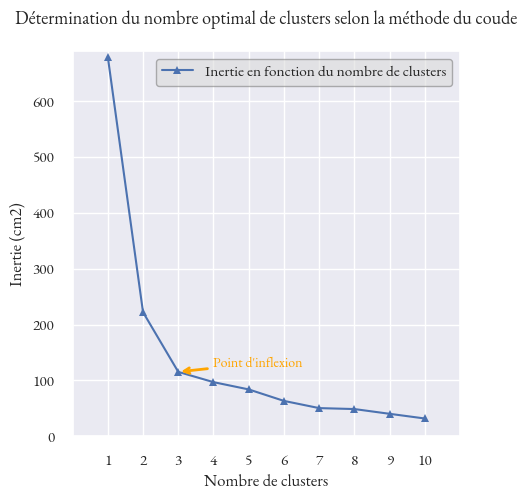

In [1679]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Tracé de la variance intra-cluster en fonction du nombre de clusters :
plt.plot(ks, 
         inertias, 
         marker = '^',
         label = 'Inertie en fonction du nombre de clusters')

# Ajout d'une annotation avec une flèche personnalisée :
optimal_k = 3  
optimal_inertias = inertias[optimal_k - 1]

# Ajout d'une annotation pour indiquer le point d'inflexion :
plt.annotate("Point d'inflexion",
             xy = (optimal_k, optimal_inertias), 
             xytext = (optimal_k + 1, optimal_inertias + 10),
             arrowprops = dict(facecolor = 'orange', 
                               edgecolor = 'orange', 
                               linewidth = 2, 
                               arrowstyle = '->', 
                               linestyle = '-'),
             fontsize = 10,
             color = 'orange')

# Ajout d'un titre à l'axe des x :
plt.xlabel('Nombre de clusters')

# Ajout d'un titre à l'axe des y :
plt.ylabel('Inertie (cm2)')

# Ajustement des graduations :
plt.xticks(ks)

# Ajout d'un titre au graphique :
plt.title('Détermination du nombre optimal de clusters selon la méthode du coude',
          fontsize = 13,
          pad = 20)

# Ajout d'une légende au graphique :
plt.legend(fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Ajustement de la limite des axes :
plt.xlim(0, 11)
plt.ylim(0, max(inertias) + 10) 

# Affichage de la figure :
plt.show()

##### _Selon la méthode du coude, le nombre optimal de clusters est de 3 (point d'inflexion)._ #####

##### _b. Méthode des silhouettes_ #####

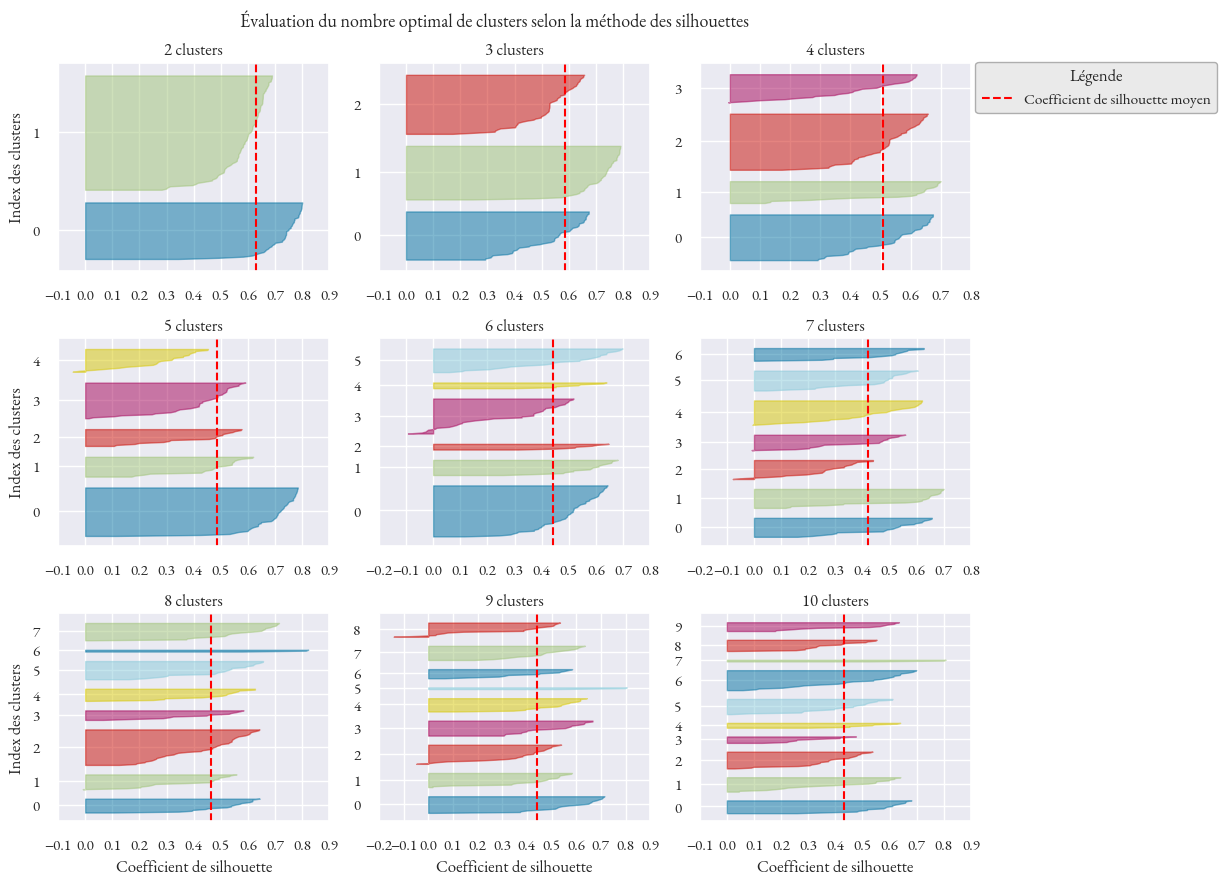

In [1680]:
# Définition des valeurs de k :
k_range = range(2, 11)

# Définition du nombre de lignes et de colonnes pour la grille :
n_cols = 3
n_rows = (len(k_range) + n_cols - 1) // n_cols

# Création d'une figure et d'une grille de subplots :
fig, axes = plt.subplots(n_rows, 
                         n_cols, 
                         figsize = (10, 
                                    3 * n_rows))

# Transformation de la matrice d'axes en un tableau 1D :
axes = axes.flatten()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Utilisation de silhouette_visualizer :
for i, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k)
    visualizer = SilhouetteVisualizer(kmeans, ax=axes[i], colors='yellowbrick')
    visualizer.fit(iris_pca_df_2d)
    visualizer.finalize()

    # Ajout d'un titre à chaque subplot avec le nombre de clusters :
    axes[i].set_title(f'{k} clusters')

    # Conservation des étiquettes des axes :
    if i % n_cols != 0:  
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel(f'Index des clusters')

    # Conservation des étiquettes des axes :
    if i // n_cols != n_rows - 1: 
        axes[i].set_xlabel('')
    else:
        axes[i].set_xlabel('Coefficient de silhouette')

    # Suppression des légendes des subplots :
    if visualizer.ax.get_legend() is not None:
        visualizer.ax.get_legend().remove()

# Suppression des axes non utilisés :
for j in range(len(k_range), len(axes)):
    fig.delaxes(axes[j])

# Création des handles pour la légende :
handles = [Line2D([0], 
                  [0], 
                  color = 'red', 
                  linestyle = '--', 
                  lw = 1.5)]

labels = ['Coefficient de silhouette moyen']

# Ajout d'une légende :
fig.legend(handles, 
           labels, 
           bbox_to_anchor = (1.23, 0.93), 
           title = 'Légende',
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Ajout d'un titre à la figure :
fig.suptitle('Évaluation du nombre optimal de clusters selon la méthode des silhouettes', 
             fontsize=13)

# Ajustement de l'espace pour les subplots et la légende :
plt.tight_layout()
plt.show()

##### _Le subplot correspondant à k = 3 clusters montre :_ #####
##### _- des épaisseurs de barres homogènes,_ #####
##### _- des barres longues (proches de 1) et au-dessus du score de silhouette,_ #####
##### _Ce subplot montre que les clusters sont bien formés, comparativement aux autres subplots._ #####

## II. PROJET 2 ##

### 1. PCA et cercle des corrélations ###

##### _a. Collecte des informations sur le jeu de données 'decathlon'_ #####

In [ ]:
# Import du jeu de données :
decathlon = pd.read_csv("dataset-b.csv",
                        sep = ";",
                        encoding = 'utf-8',
                        engine = 'python',
                        decimal = ',',
                        index_col = 0)
decathlon.head(3)

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO


In [1682]:
# Collecte du nombre de lignes et de colonnes :
n_lignes, n_colonnes = decathlon.shape

# Affichage du nombre de lignes et de colonnes :
print(f"Ce tableau contient {n_lignes} lignes et {n_colonnes} colonnes.")

Ce tableau contient 41 lignes et 13 colonnes.


In [1683]:
# Affichage du nom des colonnes :
decathlon.columns

Index(['100m', 'Longueur', 'Poids', 'Hauteur', '400m', '110m H', 'Disque',
       'Perche', 'Javelot', '1500m', 'Classement', 'Points', 'Competition'],
      dtype='object')

In [1684]:
# Affichage du contenu de la colonne "Competition" :
print("La colonne 'Competition' a pour valeurs uniques :", decathlon['Competition'].unique())

La colonne 'Competition' a pour valeurs uniques : ['JO' 'Decastar']


In [1685]:
# Analyse du jeu de données : 
# Ce jeu de données répertorie les résultats des athlètes (en index) lors des différentes épreuves d'un décathlon (dix premières colonnes).
# Les colonnes 11 et 12 correspondent respectivement au classement des athlètes et au nombre de points reçus.
# La dernière colonne définit la compétition concernée (soit JO, soit Decaster).
# L'ACP nécessite des variables quantitatives continues, ce qui est le cas des 10 premières colonnes.

##### _b. Préparation des données pour réaliser la PCA_ #####

In [1686]:
# Création d'un dataframe contenant les données des colonnes 'Classement', 'Points' et 'Competition' du dataset decathlon :
decathlon_desc = decathlon[['Classement', 'Points', 'Competition']]
decathlon_desc.head(3)

,Classement,Points,Competition
Sebrle,1,8893,JO
Clay,2,8820,JO
Karpov,3,8725,JO


In [1687]:
# Suppression des colonnes 'Classement', 'Points', 'Competition' du dataset decathlon :
decathlon_num = decathlon.drop(columns = ['Classement', 'Points', 'Competition'])
decathlon_num.head(3)

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11


In [1688]:
# Affichage du type d'objet concerné pour 'decathlon_num' :
print(f"L'objet 'decathlon_num' est de type {type(decathlon_num)}.")

L'objet 'decathlon_num' est de type <class 'pandas.core.frame.DataFrame'>.


In [1689]:
# Création de la liste des noms de variables :
epreuves = decathlon_num.columns.tolist()
epreuves

['100m',
 'Longueur',
 'Poids',
 'Hauteur',
 '400m',
 '110m H',
 'Disque',
 'Perche',
 'Javelot',
 '1500m']

##### _c. Centrage et réduction des données_ #####

In [1690]:
# Centrage et réduction des données :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(decathlon_num)

In [1691]:
# Transformation de X_scaled en dataframe :
decathlon_scaled = pd.DataFrame(X_scaled, 
                                columns = epreuves)
decathlon_scaled.round(2).head(3)


,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
0,-0.57,1.86,2.31,1.63,-1.10,-1.19,1.32,0.87,2.56,0.09
1,-2.15,2.24,0.92,0.95,-0.37,-1.02,1.73,0.50,2.39,0.26
2,-1.92,1.76,1.78,1.29,-2.46,-1.36,2.20,-0.59,-0.58,-0.08


In [1692]:
# Affichage du type d'objet :
print(type(decathlon_scaled))

<class 'pandas.core.frame.DataFrame'>


In [1693]:
# Vérification de la moyenne pour chaque colonne : 
print("La moyenne pour chaque colonne d'iris_scaled est la suivante : ")
print(decathlon_scaled.mean().round(2))

La moyenne pour chaque colonne d'iris_scaled est la suivante : 
100m        0.0
Longueur   -0.0
Poids      -0.0
Hauteur    -0.0
400m       -0.0
110m H     -0.0
Disque     -0.0
Perche     -0.0
Javelot     0.0
1500m      -0.0
dtype: float64


In [1694]:
# Vérification de l'écart-type pour chaque colonne : 
print("L'écart-type pour chaque colonne d'iris_scaled est le suivant :")
print(decathlon_scaled.std().round(2))

L'écart-type pour chaque colonne d'iris_scaled est le suivant :
100m        1.01
Longueur    1.01
Poids       1.01
Hauteur     1.01
400m        1.01
110m H      1.01
Disque      1.01
Perche      1.01
Javelot     1.01
1500m       1.01
dtype: float64


##### _d. Application de la PCA (dataset 'decathlon')_ #####

In [1695]:
# Création de l'objet PCA :
pca = PCA()

In [1696]:
# Application de la méthode fit_transform du modèle aux données iris : 
decathlon_pca = pca.fit_transform(decathlon_scaled)

In [1697]:
# Conversion de l'object en dataframe : 
decathlon_pca_df = pd.DataFrame(data = decathlon_pca)
decathlon_pca_df.round(2).head(3)

,0,1,2,3,4,5,6,7,8,9
0,-4.04,1.37,-0.29,1.94,0.38,-0.07,0.55,-0.75,0.06,-0.63
1,-3.92,0.84,0.23,1.49,-1.04,0.81,0.87,-0.30,-0.01,0.82
2,-4.62,0.04,-0.04,-1.31,0.19,-0.74,0.45,1.07,-0.18,-0.12


In [1698]:
# Calcul de la matrice des charges (loading matrix) :
loading_matrix = pd.DataFrame(pca.components_.T[:, :2],        
                              index = epreuves,
                              columns = ['CP 1', 'CP 2'])

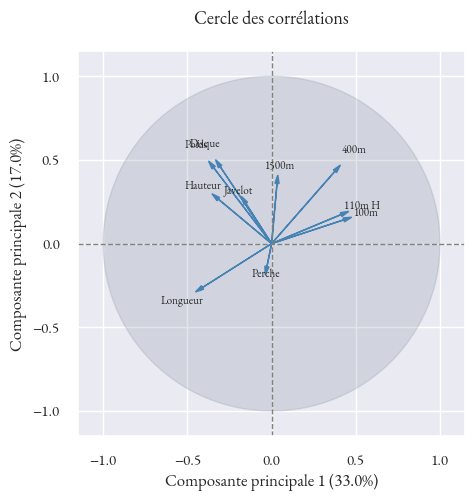

In [1699]:
# Création de la figure :
plt.figure(figsize=(5, 5))

# Paramétrage du style du graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du cercle :
cercle = plt.Circle((0, 0), 
                    1, 
                    fill = True, 
                    color = 'slategrey', 
                    alpha = 0.2)
plt.gca().add_artist(cercle)

# Ajout des vecteurs et de leurs étiquettes :
for i in loading_matrix.index:

    # Tracé des flèches représentant les vecteurs de charge :
    plt.arrow(0, 
              0, 
              loading_matrix.loc[i, 'CP 1'], 
              loading_matrix.loc[i, 'CP 2'],
              head_width = 0.025, 
              head_length = 0.05, 
              fc = 'steelblue', 
              ec = 'steelblue')

    # Ajout du texte pour étiqueter les vecteurs :
    plt.text(loading_matrix.loc[i, 'CP 1'] * 1.3,                   
             loading_matrix.loc[i, 'CP 2'] * 1.3,
             i, 
             ha = 'center', 
             va = 'center',
             fontsize = '8')
    
    
# Calcul des pourcentages de variance :
variance_cp1 = pca.explained_variance_ratio_[0].round(2) * 100  
variance_cp2 = pca.explained_variance_ratio_[1].round(2) * 100  

# Ajout des étiquettes aux axes des x et des y avec pourcentages de variance :
plt.xlabel(f'Composante principale 1 ({variance_cp1}%)')                         
plt.ylabel(f'Composante principale 2 ({variance_cp2}%)')  

# Ajout du titre au graphique :
plt.title('Cercle des corrélations', 
          pad = 20, 
          fontsize = '13')

# Ajustement des limites des axes :
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)

# Ajout de ligne horizontale (composante principale 1):
plt.axhline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Ajout de ligne verticale (composante principale 2):
plt.axvline(0, 
            color = 'grey', 
            linewidth = 1, 
            linestyle = '--')

# Affichage du graphique :
plt.show()

### 2. Représentation des individus sur le plan factoriel ###

In [1700]:
# Modification des noms de colonnes du dataframe decathlon_pca_df :
decathlon_pca_df = decathlon_pca_df.rename(columns = {decathlon_pca_df.columns[0]: 'CP 1',
                                                      decathlon_pca_df.columns[1]: 'CP 2',
                                                      decathlon_pca_df.columns[2]: 'CP 3',
                                                      decathlon_pca_df.columns[3]: 'CP 4',
                                                      decathlon_pca_df.columns[4]: 'CP 5',
                                                      decathlon_pca_df.columns[5]: 'CP 6',
                                                      decathlon_pca_df.columns[6]: 'CP 7',
                                                      decathlon_pca_df.columns[7]: 'CP 8',
                                                      decathlon_pca_df.columns[8]: 'CP 9',
                                                      decathlon_pca_df.columns[9]: 'CP 10'})
decathlon_pca_df.round(2).head(3)

,CP 1,CP 2,CP 3,CP 4,CP 5,CP 6,CP 7,CP 8,CP 9,CP 10
0,-4.04,1.37,-0.29,1.94,0.38,-0.07,0.55,-0.75,0.06,-0.63
1,-3.92,0.84,0.23,1.49,-1.04,0.81,0.87,-0.30,-0.01,0.82
2,-4.62,0.04,-0.04,-1.31,0.19,-0.74,0.45,1.07,-0.18,-0.12


In [1701]:
# Création d'une copie du DataFrame decathlon_pca_df :
decathlon_pca_df_cos2 = decathlon_pca_df.copy()

# Calcul du cos² pour chaque composante principale :
decathlon_pca_df_cos2['CP 1 (cos²)'] = decathlon_pca_df_cos2['CP 1'] ** 2
decathlon_pca_df_cos2['CP 2 (cos²)'] = decathlon_pca_df_cos2['CP 2'] ** 2
decathlon_pca_df_cos2['CP 3 (cos²)'] = decathlon_pca_df_cos2['CP 3'] ** 2
decathlon_pca_df_cos2['CP 4 (cos²)'] = decathlon_pca_df_cos2['CP 4'] ** 2
decathlon_pca_df_cos2['CP 5 (cos²)'] = decathlon_pca_df_cos2['CP 5'] ** 2

# Calcul de la communalité pour les CP1 et CP2 :
decathlon_pca_df_cos2['Communalité CP 1 et CP 2'] = decathlon_pca_df_cos2[['CP 1 (cos²)', 'CP 2 (cos²)']].sum(axis=1)

# Affichage du DataFrame avec la nouvelle colonne :
decathlon_pca_df_cos2.round(2).head(3)

,CP 1,CP 2,CP 3,CP 4,CP 5,CP 6,CP 7,CP 8,CP 9,CP 10,CP 1 (cos²),CP 2 (cos²),CP 3 (cos²),CP 4 (cos²),CP 5 (cos²),Communalité CP 1 et CP 2
0,-4.04,1.37,-0.29,1.94,0.38,-0.07,0.55,-0.75,0.06,-0.63,16.31,1.87,0.08,3.77,0.14,18.17
1,-3.92,0.84,0.23,1.49,-1.04,0.81,0.87,-0.30,-0.01,0.82,15.36,0.70,0.05,2.23,1.08,16.06
2,-4.62,0.04,-0.04,-1.31,0.19,-0.74,0.45,1.07,-0.18,-0.12,21.34,0.00,0.00,1.73,0.04,21.35


In [1702]:
# Conversion de la liste en série Pandas :
epreuves_series = pd.Series(epreuves)

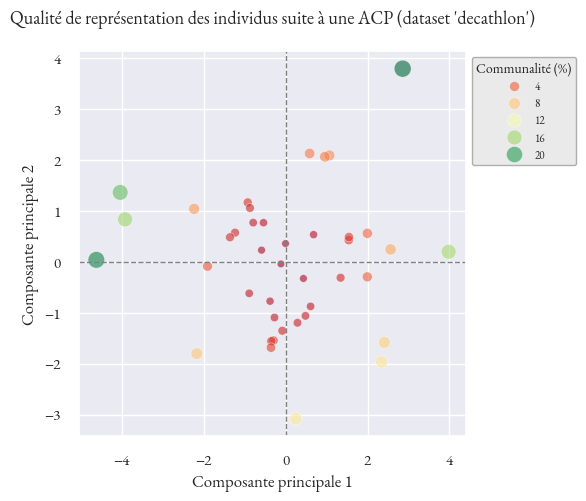

In [1703]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(5, 5))

# Normalisation des valeurs de la communalité pour la palette de couleurs :
norm = mcolors.Normalize(vmin=decathlon_pca_df_cos2['Communalité CP 1 et CP 2'].min(), 
                         vmax=decathlon_pca_df_cos2['Communalité CP 1 et CP 2'].max())

# Choix d'une palette de couleurs :
cmap = plt.get_cmap('RdYlGn')  

# Création du scatterplot avec ajustement de la taille des bulles selon la communalité :
scatter = sns.scatterplot(data=decathlon_pca_df_cos2,
                          x='CP 1',
                          y='CP 2',
                          hue='Communalité CP 1 et CP 2',  # On garde l'argument hue mais sans la colorbar
                          size='Communalité CP 1 et CP 2',  
                          sizes=(30, 150),      
                          palette=cmap,
                          alpha=0.6)  # Utilisation de 'brief' pour afficher la légende sans colorbar

# Ajout des étiquettes aux axes des x et des y :
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')

# Ajout du titre au graphique :
ax.set_title("Qualité de représentation des individus suite à une ACP (dataset 'decathlon')",
             pad=20,
             fontsize=13)

# Ajustement des limites des axes :
plt.autoscale()

# Ajout de ligne horizontale (composante principale 1):
ax.axhline(0,
           color='grey',
           linewidth=1,
           linestyle='--')

# Ajout de ligne verticale (composante principale 2):
ax.axvline(0,
           color='grey',
           linewidth=1,
           linestyle='--')

# Ajout de la légende personnalisée pour la taille des points :
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles, 
          labels, 
          title = "Communalité (%)",
          title_fontsize = '10',
          fontsize='8',
          bbox_to_anchor=(1, 1),
          fancybox = True,
          frameon = True,             
          framealpha = 0.6,             
          facecolor = 'gainsboro',
          edgecolor = 'grey')

# Affichage du graphique :
plt.show()

### 4. Table des contributions vectorielles ###

In [1704]:
# Calcul de la matrice des charges (loading matrix) :
loading_matrix = pd.DataFrame(pca.components_.T,        
                              index = epreuves,
                              columns = ['CP 1', 'CP 2', 'CP 3', 'CP 4', 'CP 5', 'CP 6', 'CP 7', 'CP 8', 'CP 9', 'CP 10'])

In [1705]:
# Calcul des cos² pour chaque composante principale (CP 1 à CP 10) :
cos2_matrix = loading_matrix[['CP 1', 'CP 2', 'CP 3', 'CP 4', 'CP 5', 'CP 6', 'CP 7', 'CP 8', 'CP 9', 'CP 10']] ** 2

# Calcul de la communalité (somme des cos²) sur les composantes CP 1 à CP 10 :
cos2_matrix['Communalité'] = cos2_matrix.sum(axis=1)

# Changement des noms de colonnes pour afficher '(cos²)' dans les entêtes :
cos2_matrix.rename(columns={
    'CP 1': 'CP 1 (cos²)', 
    'CP 2': 'CP 2 (cos²)',
    'CP 3': 'CP 3 (cos²)', 
    'CP 4': 'CP 4 (cos²)', 
    'CP 5': 'CP 5 (cos²)',
    'CP 6': 'CP 6 (cos²)', 
    'CP 7': 'CP 7 (cos²)', 
    'CP 8': 'CP 8 (cos²)', 
    'CP 9': 'CP 9 (cos²)', 
    'CP 10': 'CP 10 (cos²)'
}, inplace=True)

# Contribution de chaque variable à chaque composante principale :
contributions = (cos2_matrix[['CP 1 (cos²)', 
                              'CP 2 (cos²)', 
                              'CP 3 (cos²)', 
                              'CP 4 (cos²)', 
                              'CP 5 (cos²)',
                              'CP 6 (cos²)', 
                              'CP 7 (cos²)', 
                              'CP 8 (cos²)', 
                              'CP 9 (cos²)', 
                              'CP 10 (cos²)']]
                 .div(cos2_matrix[['CP 1 (cos²)', 
                                   'CP 2 (cos²)', 
                                   'CP 3 (cos²)', 
                                   'CP 4 (cos²)', 
                                   'CP 5 (cos²)',
                                   'CP 6 (cos²)', 
                                   'CP 7 (cos²)', 
                                   'CP 8 (cos²)', 
                                   'CP 9 (cos²)', 
                                   'CP 10 (cos²)']].sum(axis=0), 
                                   axis=1)) * 100

# Modification des noms de colonnes :
contributions.rename(columns={
    'CP 1 (cos²)': 'Contribution à CP 1', 
    'CP 2 (cos²)': 'Contribution à CP 2',
    'CP 3 (cos²)': 'Contribution à CP 3', 
    'CP 4 (cos²)': 'Contribution à CP 4', 
    'CP 5 (cos²)': 'Contribution à CP 5',
    'CP 6 (cos²)': 'Contribution à CP 6', 
    'CP 7 (cos²)': 'Contribution à CP 7', 
    'CP 8 (cos²)': 'Contribution à CP 8', 
    'CP 9 (cos²)': 'Contribution à CP 9', 
    'CP 10 (cos²)': 'Contribution à CP 10'
}, inplace=True)

# Affichage du tableau des contributions des variables aux différentes composantes principales :
print("\nContributions des variables aux différentes composantes principales (en %) :")
contributions.round(2)


Contributions des variables aux différentes composantes principales (en %) :


,Contribution à CP 1,Contribution à CP 2,Contribution à CP 3,Contribution à CP 4,Contribution à CP 5,Contribution à CP 6,Contribution à CP 7,Contribution à CP 8,Contribution à CP 9,Contribution à CP 10
100m,18.34,2.02,2.42,0.14,13.34,8.77,14.58,21.31,1.10,18.00
Longueur,16.82,6.87,2.36,0.98,0.20,9.37,39.40,0.04,23.30,0.66
Poids,11.84,20.61,0.04,3.44,1.80,9.33,9.59,9.86,18.26,15.23
Hauteur,10.00,7.06,4.79,1.74,45.05,21.88,0.84,1.56,5.94,1.13
400m,14.12,18.67,1.23,0.08,1.12,11.06,1.55,4.55,30.48,17.14
110m H,17.02,3.01,0.61,8.00,3.94,0.99,12.77,50.57,2.25,0.83
Disque,9.33,21.16,0.13,6.38,1.60,20.19,18.48,0.15,2.40,20.17
Perche,0.08,1.87,34.06,28.78,15.90,6.85,0.96,3.17,0.69,7.64
Javelot,2.35,5.78,10.81,48.00,13.60,2.66,1.14,8.77,6.12,0.77
1500m,0.10,12.95,43.54,2.46,3.44,8.90,0.70,0.02,9.47,18.42


In [1706]:
# Changement des noms de colonnes pour les contributions :
contributions.rename(columns = {'Contribution à CP 1': 'vitesse',
                                'Contribution à CP 2': 'force',
                                'Contribution à CP 3': 'puissance',
                                'Contribution à CP 4': 'technique',
                                'Contribution à CP 5': 'agilite'}, 
                                inplace = True)

# Affichage du tableau avec les nouvelles colonnes :
print("\nContributions des variables aux différentes composantes principales (en %) :")
contributions.iloc[:, :5].round(2)


Contributions des variables aux différentes composantes principales (en %) :


,vitesse,force,puissance,technique,agilite
100m,18.34,2.02,2.42,0.14,13.34
Longueur,16.82,6.87,2.36,0.98,0.20
Poids,11.84,20.61,0.04,3.44,1.80
Hauteur,10.00,7.06,4.79,1.74,45.05
400m,14.12,18.67,1.23,0.08,1.12
110m H,17.02,3.01,0.61,8.00,3.94
Disque,9.33,21.16,0.13,6.38,1.60
Perche,0.08,1.87,34.06,28.78,15.90
Javelot,2.35,5.78,10.81,48.00,13.60
1500m,0.10,12.95,43.54,2.46,3.44


##### _Analyse des contributions des variables aux différentes composantes :_ #####
##### _- 'CP 1' : 'vitesse', car les disciplines qui dominent sont 100m, 110m H, 400 m._ #####
##### _- 'CP 2' : 'force', car les disciplines qui dominent sont le lancer de poids et de disque._ #####
##### _- 'CP 3' : 'puissance', car les disciplines les plus représentées sont la perche et le 1500 m._ #####
##### _- 'CP 4' : 'technique', car les disciplines les plus représentées sont la perche et le javelot._ #####
##### _- 'CP 5' : 'agilite', car la discipline la plus représentée est le saut en hauteur._ #####

### 5. Avantages et inconvénients des méthodes K-Means et CAH ###

##### _a. K-Means_ #####

##### **Avantages :** #####
##### _- La méthode K-Means est particulièrement rapide et efficace pour traiter de grands jeux de données._ #####
##### _- Elle fonctionne bien avec des données globulaires._ #####


##### **Inconvénients** #####
##### _- K-Means nécessite un nombre de clusters prédéfini._ #####
##### _- K-Means est sensible aux outliers._ #####
##### _- K-Means est non reproductible en raison de l'initialisation aléatoire des centres de clusters._ #####
##### _- Elle suppose que les clusters sont de forme sphérique, ce qui peut être une limitation pour des données plus complexes._ #####

##### _b. Classification hiérarchique ascendante_ #####

##### **Avantages :** #####
##### _- Pas besoin de définir le nombre de clusters à l'avance._ #####
##### _- Offre une vision hiérarchique avec un dendrogramme._ #####
##### _- Permet de visualiser les relations entre clusters._ #####
##### _- Reproductible, car pas d'initialisation aléatoire._ #####
##### _- Convient bien aux petits ensembles de données._ #####

##### **Inconvénients** #####
##### _- Coûteuse en temps de calcul sur les grands jeux de données._ #####
##### _- Impraticable pour les grands ensembles de données_ #####
##### _- Choix du nombre de clusters parfois complexe_ #####

### 6. Méthodes de clustering ###

##### _a. Nombre optimal de clusters en vue de réaliser la méthode K-Means selon la méthode du coude_ #####

In [1707]:
# Sélection des 2 premières composantes principales :
decathlon_pca_df_2d = decathlon_pca_df[['CP 1', 'CP 2']].copy()
print(decathlon_pca_df_2d.shape)

(41, 2)


In [1708]:
# Préparation de la liste pour stocker les sommes des carrés des erreurs :
inertias = []

# Définition des valeurs de k (nombre de clusters) à tester :
ks = range(1, 11)

# Calcul de la variance intra-cluster pour chaque nombre de clusters :
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(decathlon_pca_df_2d)
    inertias.append(model.inertia_)

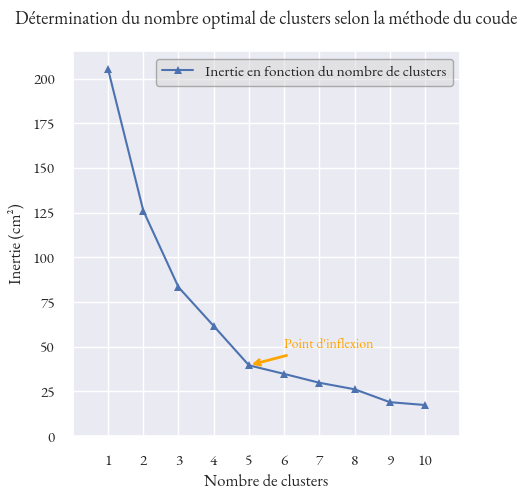

In [1709]:
# Création de la figure :
plt.figure(figsize=(5, 5))

# Tracé de la variance intra-cluster en fonction du nombre de clusters :
plt.plot(ks, 
         inertias, 
         marker = '^',
         label = 'Inertie en fonction du nombre de clusters')

# Affichage du nouveau point d'inflexion :
optimal_k = 5  
optimal_inertias = inertias[optimal_k - 1]

# Ajout d'une annotation pour indiquer le point d'inflexion :
plt.annotate("Point d'inflexion",
             xy = (optimal_k, optimal_inertias), 
             xytext = (optimal_k + 1, optimal_inertias + 10),  
             arrowprops = dict(facecolor = 'orange', 
                             edgecolor = 'orange', 
                             linewidth = 2, 
                             arrowstyle = '->', 
                             linestyle = '-'),
             fontsize = 10,
             color = 'orange')

# Ajout d'un titre à l'axe des x :
plt.xlabel('Nombre de clusters')

# Ajout d'un titre à l'axe des y :
plt.ylabel('Inertie (cm²)')

# Ajustement des graduations :
plt.xticks(ks)

# Ajout d'un titre au graphique :
plt.title('Détermination du nombre optimal de clusters selon la méthode du coude',
          fontsize = 13,
          pad = 20)

# Ajout d'une légende au graphique :
plt.legend(fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Ajustement de la limite des axes :
plt.xlim(0, 11)
plt.ylim(0, max(inertias) + 10) 

# Affichage de la figure :
plt.show()

##### _b. Nombre optimal de clusters en vue de réaliser la méthode K-Means selon la méthode des silhouettes_ #####

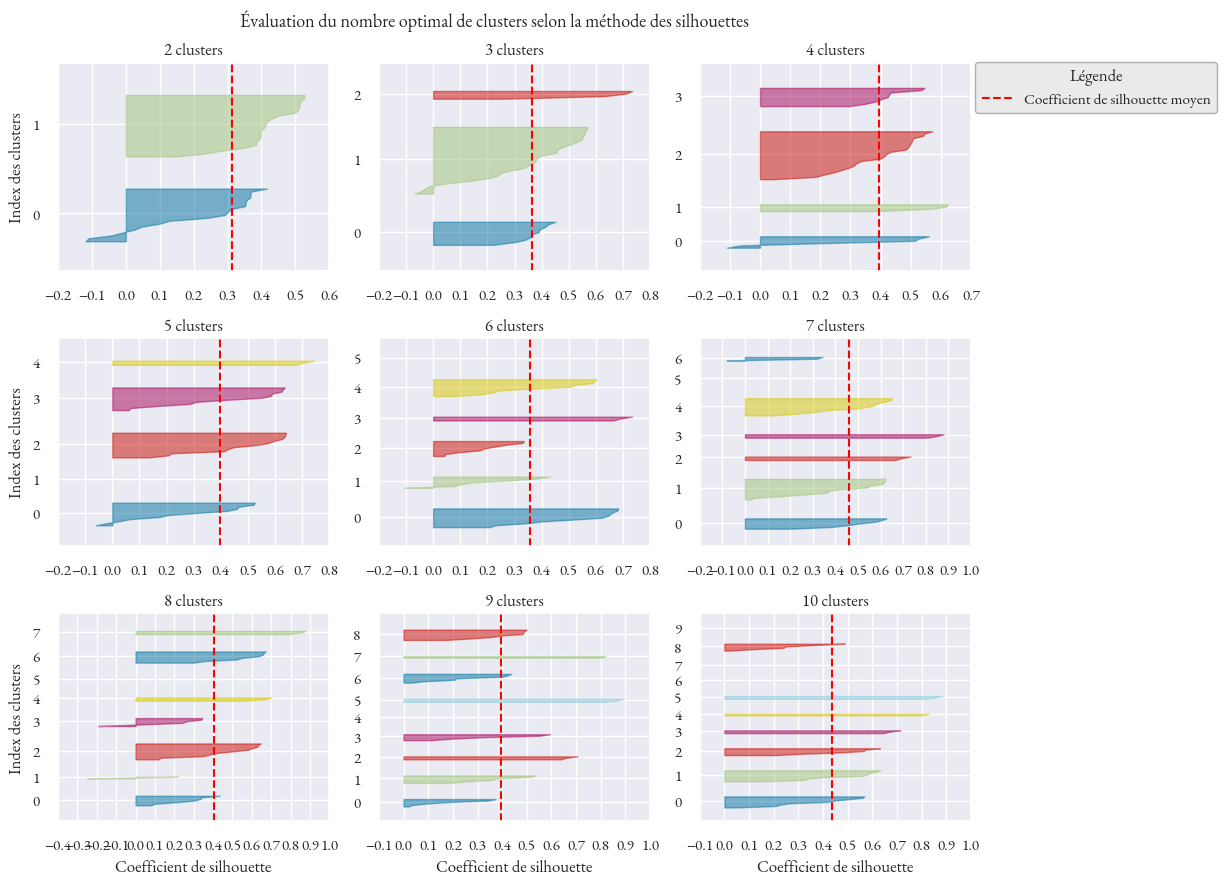

In [1710]:
# Définition des valeurs de k :
k_range = range(2, 11)

# Définition du nombre de lignes et de colonnes pour la grille :
n_cols = 3
n_rows = (len(k_range) + n_cols - 1) // n_cols

# Création d'une figure et d'une grille de subplots :
fig, axes = plt.subplots(n_rows, 
                         n_cols, 
                         figsize = (10, 
                                    3 * n_rows))

# Transformation de la matrice d'axes en un tableau 1D :
axes = axes.flatten()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Utilisation de silhouette_visualizer :
for i, k in enumerate(k_range):
    kmeans = KMeans(n_clusters = k)
    visualizer = SilhouetteVisualizer(kmeans, 
                                      ax = axes[i], 
                                      colors = 'yellowbrick')
    visualizer.fit(decathlon_pca_df_2d)  
    visualizer.finalize()

    # Ajout d'un titre à chaque subplot avec le nombre de clusters :
    axes[i].set_title(f'{k} clusters')

    # Conservation des étiquettes des axes :
    if i % n_cols != 0:  
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel(f'Index des clusters')

    # Conservation des étiquettes des axes :
    if i // n_cols != n_rows - 1: 
        axes[i].set_xlabel('')
    else:
        axes[i].set_xlabel('Coefficient de silhouette')

    # Suppression des légendes des subplots :
    if visualizer.ax.get_legend() is not None:
        visualizer.ax.get_legend().remove()

# Suppression des axes non utilisés :
for j in range(len(k_range), len(axes)):
    fig.delaxes(axes[j])

# Création des handles pour la légende :
handles = [Line2D([0], 
                  [0], 
                  color = 'red', 
                  linestyle = '--', 
                  lw = 1.5)]

labels = ['Coefficient de silhouette moyen']

# Ajout d'une légende :
fig.legend(handles, 
           labels, 
           bbox_to_anchor = (1.23, 0.93), 
           title = 'Légende',
           fancybox = True,
           frameon = True,             
           framealpha = 0.6,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Ajout d'un titre à la figure :
fig.suptitle('Évaluation du nombre optimal de clusters selon la méthode des silhouettes', 
             fontsize = 13)

# Ajustement de l'espace pour les subplots et la légende :
plt.tight_layout()
plt.show()

##### _La méthode des silhouettes semble indiquer que 5 clusters est la meilleure option._ #####

##### _c. Méthode K-Means_ #####

In [1711]:
# Spécification du nombre de clusters : 
n_clusters = 5  

# Création de l'instance KMeans :
kmeans = KMeans(n_clusters = n_clusters)

# Ajustement du modèle et prédiction des clusters :
decathlon_pca_df['cluster'] = kmeans.fit_predict(decathlon_pca_df)

# Affichage des 5 premières lignes du DataFrame avec les clusters :
decathlon_pca_df.round(2).head()

,CP 1,CP 2,CP 3,CP 4,CP 5,CP 6,CP 7,CP 8,CP 9,CP 10,cluster
0,-4.04,1.37,-0.29,1.94,0.38,-0.07,0.55,-0.75,0.06,-0.63,1
1,-3.92,0.84,0.23,1.49,-1.04,0.81,0.87,-0.30,-0.01,0.82,1
2,-4.62,0.04,-0.04,-1.31,0.19,-0.74,0.45,1.07,-0.18,-0.12,1
3,-2.23,1.04,-1.86,-0.74,0.98,0.04,0.19,0.69,0.44,0.17,1
4,-2.17,-1.80,0.85,-0.28,-0.15,0.08,-0.06,0.21,0.17,-0.08,1


In [1712]:
# Application de K-means sur les deux composantes principales :
kmeans = KMeans(n_clusters = n_clusters)
clusters = kmeans.fit_predict(decathlon_pca_df_2d)
clusters

array([4, 4, 4, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 3, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1],
      dtype=int32)

In [1713]:
# Ajout des clusters aux données originales :
decathlon_pca_df_2d.loc[:, 'cluster'] = clusters
clusters

array([4, 4, 4, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 3, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1],
      dtype=int32)

In [1714]:
# Extraction des coordonnées des centroïdes :
centroides = kmeans.cluster_centers_
centroides.round(2)

array([[ 0.39, -1.39],
       [ 1.66,  0.74],
       [-1.05,  0.3 ],
       [ 2.86,  3.8 ],
       [-4.19,  0.75]])

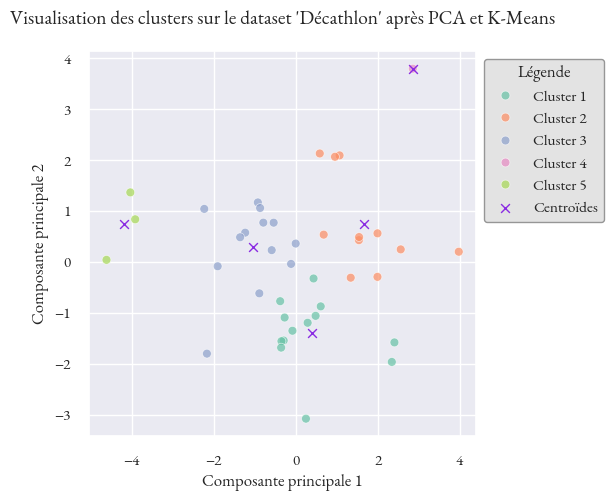

In [1715]:
# Création de la figure avec une taille personnalisée : 
plt.figure(figsize = (5, 5))

# Tracé des individus avec une couleur par cluster :
sns.scatterplot(x = 'CP 1', 
                y = 'CP 2', 
                hue = 'cluster', 
                data = decathlon_pca_df_2d,  
                palette = 'Set2', 
                s = 40, 
                alpha = 0.7)

# Représentation des centroïdes :
plt.scatter(centroides[:, 0], 
            centroides[:, 1], 
            c = 'blueviolet', 
            s = 40,  
            marker = 'x',  
            label = 'Centroïdes',
            linewidths = 1)

# Ajout du titre au graphique :
plt.title("Visualisation des clusters sur le dataset 'Décathlon' après PCA et K-Means",  
          pad = 20,
          fontsize = 14)

# Modification des étiquettes des axes :
plt.xlabel('Composante principale 1', fontsize = 12)
plt.ylabel('Composante principale 2', fontsize = 12)

# Ajustement des axes au contenu du graphique :
plt.autoscale()

# Obtention des handles et labels de la légende :
handles, labels = plt.gca().get_legend_handles_labels()

# Remplacement des étiquettes des clusters :
cluster_labels = [f'Cluster {i+1}' for i in range(len(set(decathlon_pca_df_2d['cluster'])))]

# Ajout des labels des clusters aux handles :
new_handles = [handles[0]]
new_handles.extend(handles[1:len(cluster_labels) + 1])

# Actualisation de la légende :
plt.legend(handles = new_handles,
           labels = cluster_labels + ['Centroïdes'],
           title = 'Légende',
           bbox_to_anchor = (1, 1),
           loc = 'upper left',
           fancybox = True,
           frameon = True,             
           framealpha = 0.8,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Affichage du graphique :
plt.show()

In [1716]:
# Comptage des échantillons pour chaque cluster :
cluster_counts = decathlon_pca_df_2d['cluster'].value_counts()

# Obtention du nombre total d'échantillons dans le DataFrame :
total_samples = len(decathlon_pca_df_2d)

# Calcul des proportions de chaque cluster par rapport au total :
cluster_proportions = cluster_counts / total_samples

# Conversion des proportions en pourcentages :
cluster_proportions_percentage = cluster_proportions.round(2) * 100

# Rassemblement des clusters et de leurs proportions en pourcentage :
cluster_proportions_df = pd.DataFrame({
    'Cluster': ['Cluster 1', 
                'Cluster 2', 
                'Cluster 3', 
                'Cluster 4', 
                'Cluster 5'],
    'Proportion (%)': cluster_proportions_percentage.sort_index().values
})

# Affichage du dataframe :
cluster_proportions_df

,Cluster,Proportion (%)
0,Cluster 1,32.0
1,Cluster 2,27.0
2,Cluster 3,32.0
3,Cluster 4,2.0
4,Cluster 5,7.0


##### _d. Méthode CAH_ #####

In [1717]:
# Utilisation de la méthode 'ward' :
linkage_matrix = linkage(decathlon_scaled, 
                         method = 'ward')

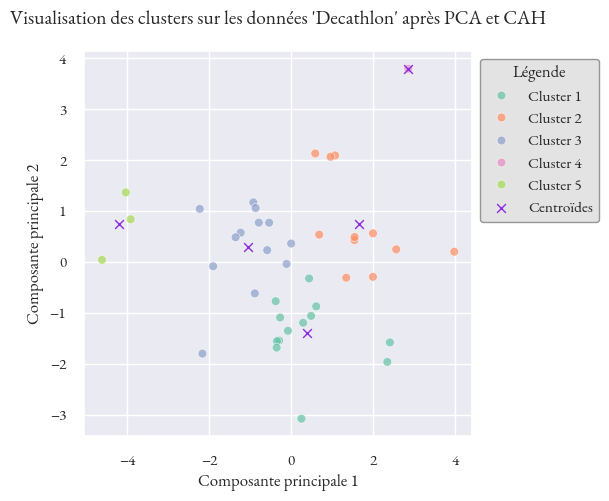

In [1718]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Tracé des individus avec une couleur par cluster :
sns.scatterplot(x = 'CP 1', 
                y = 'CP 2', 
                hue = 'cluster', 
                data = decathlon_pca_df_2d,  
                palette = 'Set2', 
                s = 40, 
                alpha = 0.7)

# Représentation des centroïdes :
plt.scatter(centroides[:, 0],
            centroides[:, 1],
            c = 'blueviolet', 
            s = 40,
            marker = 'x',
            label = 'Centroïdes',
            linewidths = 1)

# Ajout du titre au graphique :
plt.title("Visualisation des clusters sur les données 'Decathlon' après PCA et CAH",  
          pad = 20,
          fontsize = 14)

# Modification des étiquettes des axes :
plt.xlabel('Composante principale 1', 
           fontsize = 12)
plt.ylabel('Composante principale 2', 
           fontsize = 12)

# Ajustement des axes au contenu du graphique :
plt.autoscale()

# Obtention des handles et labels de la légende :
handles, labels = plt.gca().get_legend_handles_labels()

# Remplacement des étiquettes des clusters :
cluster_labels = [f'Cluster {i+1}' for i in range(len(set(decathlon_pca_df_2d['cluster'])))]

# Sélection du premier handle pour la légende :
new_handles = [handles[0]]

# Ajout des handles des clusters dans la liste 'new_handles' :
new_handles.extend(handles[1:len(cluster_labels) + 1])

# Actualisation de la légende :
plt.legend(handles = new_handles,
           labels = cluster_labels + ['Centroïdes'],
           title = 'Légende',
           bbox_to_anchor = (1, 1),
           fancybox = True,
           frameon = True,             
           framealpha = 0.8,             
           facecolor = 'gainsboro',
           edgecolor = 'grey')

# Affichage du graphique :
plt.show()

### 7. Dendrogramme suite à CAH ###

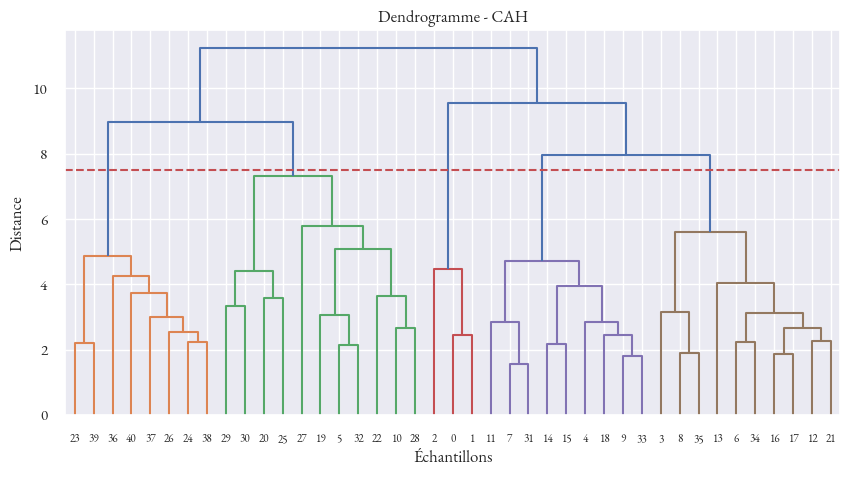

In [1719]:
# Création de la figure :
plt.figure(figsize = (10, 5))

# Paramétrage du style de graphique : 
sns.set_style('darkgrid')

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Visualisation du dendrogramme :
dendrogram(linkage_matrix, 
           leaf_rotation = 0,
           leaf_font_size = 8)

# Ajout du titre au graphique :
plt.title('Dendrogramme - CAH')

# Ajout des étiquettes aux axes :
plt.xlabel('Échantillons')
plt.ylabel('Distance')

# Ajout de ligne horizontale :
plt.axhline(y = 7.5, 
            color = 'r', 
            linestyle = '--')

# Affichage du graphique :
plt.show()

In [1720]:
# Définition du seuil de distance de coupure :
seuil_distance_coupure = 7.5

In [1721]:
# Génération des clusters :
clusters = fcluster(linkage_matrix, 
                    t = seuil_distance_coupure, 
                    criterion = 'distance')

In [1722]:
# Ajout des clusters au jeu de données après PCA :
decathlon_pca_df_2d['Cluster_CAH'] = clusters
decathlon_pca_df_2d.round(2).head(3)

,CP 1,CP 2,cluster,Cluster_CAH
0,-4.04,1.37,4,3
1,-3.92,0.84,4,3
2,-4.62,0.04,4,3


In [1723]:
# Affichage du nombre de clusters formés :
nb_clusters = len(set(clusters))
print(f"Nombre de clusters formés : {nb_clusters}")

Nombre de clusters formés : 5


##### _Il est pertinent de choisir le partitionnement correspondant au plus grand saut entre deux clusters consécutifs._ #####

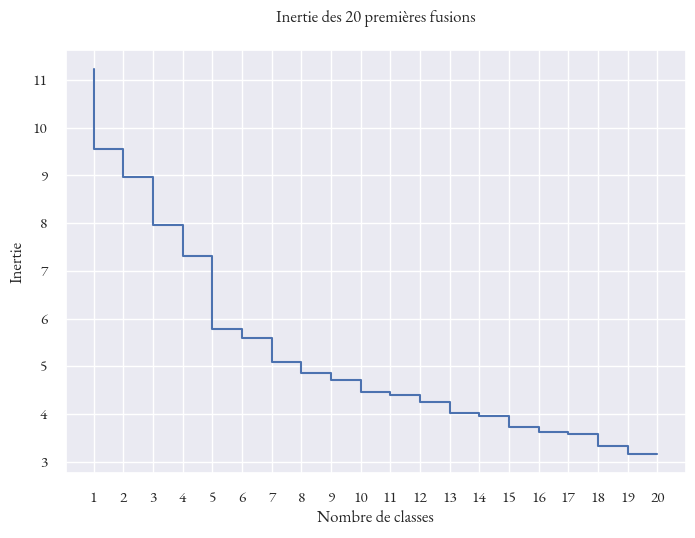

In [1724]:
# Extraction des hauteurs (inertie) de la matrice de liaison :
inertie = np.sort(linkage_matrix[:, 2])[::-1]

# Création du graphique en escalier des 20 premières inerties :
plt.step(range(1, 21), inertie[:20])

# Ajout des étiquettes et du titre :
plt.xlabel('Nombre de classes')
plt.ylabel('Inertie')
plt.title('Inertie des 20 premières fusions',
          pad = 20)

# Définition des graduations de l'axe des x :
plt.xticks(np.arange(1, 21, 1))

# Affichage du graphique :
plt.show()

##### _Ici, on observe un saut net à 5 classes. Il s'agira ainsi du nombre de clusters retenus en définitive._ #####

## III. PROJET 3 ##

### 1. Analyse des correspondances simples vs multiples ###

##### _L'analyse des correspondances simple est utilisée pour étudier les relations entre deux variables qualitatives, en projetant les catégories des variables dans un espace de faible dimension. Elle permet d'explorer les associations entre l'ensemble des modalités de ces variables._ #####

##### _L'analyse des correspondances multiples (ACM) est une extension de l'analyse des correspondances simple qui permet d'analyser les interactions complexes entre les modalités de plusieurs variables qualitatives._ #####

### 2. Représentation des variables après MCA ###

##### _a. Analyse du jeu de données_ #####

In [ ]:
# Import du jeu de données :
tinder = pd.read_csv("dataset-c.csv", 
                   sep = ",",
                   encoding = "utf-8",
                   engine = "python",
                   decimal = ",")
tinder.round(2).head(3)

,userid,date.crea,score,n.matches,n.updates.photo,n.photos,last.connex,last.up.photo,last.pr.update,gender,sent.ana,length.prof,voyage,laugh,photo.elevator,photo.beach,Country
0,1,9/17/2011,1.50,11,5,6,10/7/2011,10/2/2011,NaN,1,6.49,0.00,0,0,0,0,France
1,2,1/17/2017,8.95,56,2,6,1/31/2017,2/3/2017,NaN,1,4.59,20.72,0,0,0,1,Germany
2,3,5/14/2019,2.50,13,3,4,6/17/2019,6/19/2019,NaN,1,6.47,31.40,0,0,0,1,England


In [1726]:
# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

In [1727]:
# Collecte du nombre de lignes et de colonnes :
n_lignes, n_colonnes = tinder.shape
print(f"Ce tableau contient {n_lignes} lignes et {n_colonnes} colonnes.")

Ce tableau contient 3000 lignes et 17 colonnes.


In [1728]:
# Affichage des types de variables :
print("Les types des variables sont :")
print("") 
print(tinder.dtypes)

Les types des variables sont :

userid               int64
date.crea           object
score              float64
n.matches            int64
n.updates.photo      int64
n.photos             int64
last.connex         object
last.up.photo       object
last.pr.update     float64
gender               int64
sent.ana           float64
length.prof        float64
voyage               int64
laugh                int64
photo.elevator       int64
photo.beach          int64
Country             object
dtype: object


##### _b. Préparation des données (tableau disjonctif)_ #####

In [1729]:
# Création d'un tableau de variables catégorielles :
colonnes_cat = ['gender', 
                'Country', 
                'voyage', 
                'laugh', 
                'photo.elevator', 
                'photo.beach']
colonnes_cat

['gender', 'Country', 'voyage', 'laugh', 'photo.elevator', 'photo.beach']

In [1730]:
# Création d'un DataFrame avec uniquement des variables catégorielles :
tinder_cat = tinder[colonnes_cat].copy()
tinder_cat.head(3)

,gender,Country,voyage,laugh,photo.elevator,photo.beach
0,1,France,0,0,0,0
1,1,Germany,0,0,0,1
2,1,England,0,0,0,1


In [ ]:
# Conversion des colonnes en    *:
for col in colonnes_cat:
    tinder_cat[col] = tinder_cat[col].astype('category')
tinder_cat.head(3)

,gender,Country,voyage,laugh,photo.elevator,photo.beach
0,1,France,0,0,0,0
1,1,Germany,0,0,0,1
2,1,England,0,0,0,1


In [1732]:
# Analyse des types de variables :
print(tinder_cat.dtypes)

gender            category
Country           category
voyage            category
laugh             category
photo.elevator    category
photo.beach       category
dtype: object


##### _c. Mise en oeuvre de la méthode ACM_ #####

In [1733]:
# Initialisation de l'ACM :
acm = prince.MCA(n_components = 2, 
                 n_iter = 3, 
                 copy = True, 
                 check_input = True, 
                 engine = 'scipy',
                 random_state = 42)

# Ajustement de l'ACM sur le DataFrame :
acm = acm.fit(tinder_cat)

# Transformation des données pour obtenir les coordonnées des individus :
transformed_data = acm.transform(tinder_cat)

# Affichage des résultats de la transformation :
transformed_data.round(2).head(3)

,0,1
0,-0.22,0.31
1,-0.84,0.31
2,-0.87,-0.36


In [1734]:
# Affichage des types d'objets du dataframe :
print(tinder_cat.dtypes)

gender            category
Country           category
voyage            category
laugh             category
photo.elevator    category
photo.beach       category
dtype: object


In [1735]:
# Suppression des lignes avec des valeurs manquantes :
tinder_cat.dropna(inplace = True)

In [1736]:
# Extraction des coordonnées des modalités :
modalites = acm.row_coordinates(tinder_cat)
modalites = modalites.rename(columns = {0: 'Dimension 1', 
                                        1: 'Dimension 2'})
modalites.round(2)

,Dimension 1,Dimension 2
0,-0.22,0.31
1,-0.84,0.31
2,-0.87,-0.36
3,-0.30,0.23
4,0.39,-0.11
...,...,...
2995,0.36,-0.78
2996,0.40,-0.21
2997,-0.23,0.41
2998,0.28,-0.23


##### _d. Représentation des variables_ #####

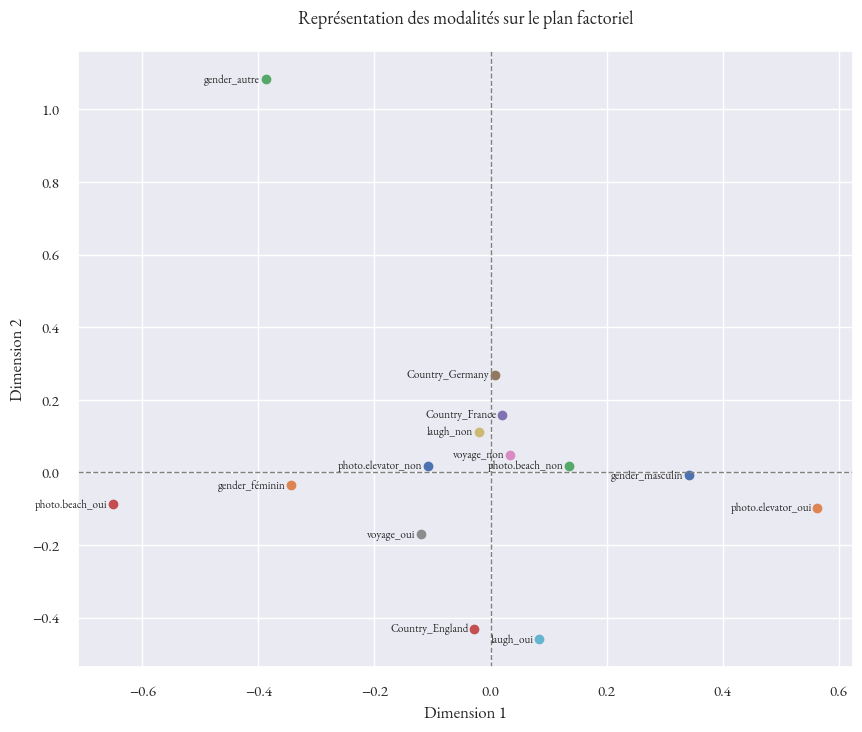

In [1737]:
# Création de la figure :
plt.figure(figsize = (10, 8))

# Création des dictionnaires de correspondance pour les étiquettes :
gender_labels = {0: 'masculin', 1: 'féminin', 2: 'autre'}
voyage_labels = {0: 'non', 1: 'oui'}
laugh_labels = {0: 'non', 1: 'oui'}
photo_elevator_labels = {0: 'non', 1: 'oui'}
photo_beach_labels = {0: 'non', 1: 'oui'}

# Tracé des modalités pour chaque colonne catégorielle :
for col in colonnes_cat:
    categories = tinder_cat[col].cat.categories
    for i, category in enumerate(categories):

        # Calcul des coordonnées pour chaque modalité :
        x = transformed_data.loc[tinder_cat[col] == category, 0].mean()
        y = transformed_data.loc[tinder_cat[col] == category, 1].mean()
        
        # Création de l'étiquette sous la forme 'nom_variable_valeur_variable' :
        if col == 'gender':
            label = f'{col}_{gender_labels[i]}'
        elif col == 'voyage':
            label = f'{col}_{voyage_labels[i]}'
        elif col == 'laugh':
            label = f'{col}_{laugh_labels[i]}'
        elif col == 'photo.elevator':
            label = f'{col}_{photo_elevator_labels[i]}'
        elif col == 'photo.beach':
            label = f'{col}_{photo_beach_labels[i]}'
        else:
            label = f'{col}_{category}' 

        # Tracé du point :
        plt.scatter(x, y)
        
        # Ajout de l'étiquette sous le point :
        plt.text(x-0.01, 
                 y, 
                 label, 
                 fontsize = 8, 
                 ha = 'right', 
                 va = 'center') 

# Ajout d'un titre au graphique :'
plt.title('Représentation des modalités sur le plan factoriel',
          pad = 20,
          fontsize = '13')

# Ajout des étiquettes aux axes des x et y :
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Tracé des lignes horizontales et verticales pour mieux visualiser les axes (x = 0 et y = 0) :
plt.axhline(0, 
            color = 'grey', 
            lw = 1, 
            ls = '--')
plt.axvline(0, 
            color = 'grey', 
            lw = 1, 
            ls = '--')

# Affichage du graphique :
plt.show()

### 3. Liens entre modalités ###

In [1738]:
# Affichage de l'inertie totale et de l'inertie par dimension :
eigenvalues = acm.eigenvalues_
total_inertia = sum(eigenvalues)
variance_explained = [(ev / total_inertia) * 100 for ev in eigenvalues]

# Résumé des résultats :
for i, (ev, ve) in enumerate(zip(eigenvalues, variance_explained)):
    print(f"Dimension {i+1} : Inertie = {ev:.4f}, Variance expliquée = {ve:.2f}%")

# Calcul de la variance expliquée totale pour les axes 1 et 2 :
total_variance_axes_1_and_2 = variance_explained[0] + variance_explained[1]
print(f"Inertie Totale : {total_inertia:.4f}")
print(f"Variance expliquée totale (Axes 1 et 2) : {total_variance_axes_1_and_2:.2f}%")

Dimension 1 : Inertie = 0.2131, Variance expliquée = 55.15%
Dimension 2 : Inertie = 0.1734, Variance expliquée = 44.85%
Inertie Totale : 0.3865
Variance expliquée totale (Axes 1 et 2) : 100.00%


##### _L'inertie des axes 1 et 2 est de 100% : cela signifie que l'ACM a réussi à capturer toute la structure des données dans ces deux axes, aucun autre axe (dimension) ne contribue à expliquer la variance restante, ce qui est un bon signe de l'efficacité de l'analyse._ #####

### 4. Profil d'utilisateur ###

##### _Les modalités proches l'une de l'autre sont similaires ou partagent des caractéristiques communes. On peut résumer le garphique de la façon suivante :_ #####
##### _L'axe vertical oppose en haut laugh-non et voyage-non et en bas laugh-oui et voyage-oui : on observe que les francais et anglais sont plus enclins à ne pas afficher les mots-clés 'rire' et 'voyage', contrairement aux anglais dans leur description de profil._ #####
##### _L'axe horizontal oppose à gauche photo-beach-oui, photo-elevator-non et voyage-oui et à droite photo-beach-non, photo-elevator-oui et voyage-non : on observe que les individus masculins sont plus enclins à afficher des photos prises dans des ascenseurs et non à la plage et à ne pas mentionner le mot-clé voyage contrairement aux individus féminins._ #####

### 5. Table des contributions des variables aux deux premiers axes ###

In [1739]:
# Récupération des coordonnées des modalités des variables :
coord_modalites = acm.column_coordinates(tinder_cat)

# Changement des noms de colonnes des coordonnées pour les dimensions 1 et 2 :
coord_modalites = coord_modalites.rename(columns={0: 'Dimension 1', 1: 'Dimension 2'})

# Affichage des coordonnées des modalités :
print("Coordonnées des modalités :")
coord_modalites.round(2).head(3)

Coordonnées des modalités :


,Dimension 1,Dimension 2
gender_0,0.74,-0.02
gender_1,-0.74,-0.09
gender_2,-0.84,2.60


In [1740]:
# Calcul de la contribution des variables aux dimensions :
contrib_dim1 = (coord_modalites['Dimension 1'] ** 2) / total_inertia
contrib_dim2 = (coord_modalites['Dimension 2'] ** 2) / total_inertia

# Ajout des contributions au DataFrame :
contrib = pd.DataFrame({'Contribution Dimension 1': contrib_dim1, 
                        'Contribution Dimension 2': contrib_dim2})

# Affichage de la table de contribution des variables aux dimensions :
print("Table des contributions des variables aux dimensions :")
contrib.round(2)

Table des contributions des variables aux dimensions :


,Contribution Dimension 1,Contribution Dimension 2
gender_0,1.42,0.00
gender_1,1.43,0.02
gender_2,1.82,17.51
Country_England,0.01,2.76
Country_France,0.00,0.38
Country_Germany,0.00,1.08
voyage_0,0.01,0.04
voyage_1,0.17,0.43
laugh_0,0.01,0.19
laugh_1,0.09,3.15


## IV. PROJET 4 ##

### 1. Création du jeu de données ###

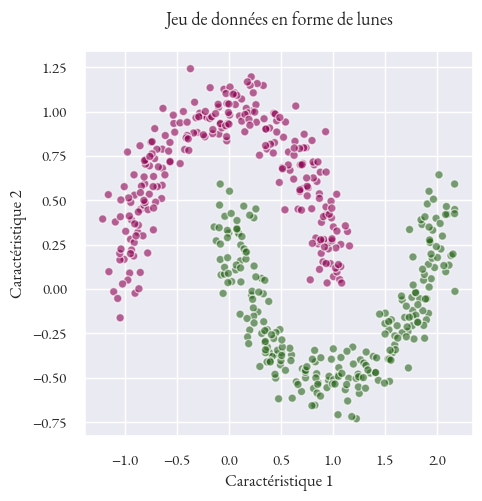

In [1741]:
# Génération du jeu de données :
X, y = make_moons(n_samples = 500, 
                  noise = 0.1, 
                  random_state = 42)

# Création d'une nouvelle figure :
plt.figure(figsize = (5, 5))

# Tracé des points du jeu de données :
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y, 
            cmap = 'PiYG',
            edgecolors = 'white',
            alpha = 0.6)

# Ajout d'un titre au jeu de données :
plt.title('Jeu de données en forme de lunes',
          pad = 20,
          fontsize = '13')

# Ajout des étiquettes aux axes des x et des y :
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Ajustement automatique des axes aux données :
plt.autoscale()

# Affichage de la figure :
plt.show()

### 2. Techniques de clustering ###

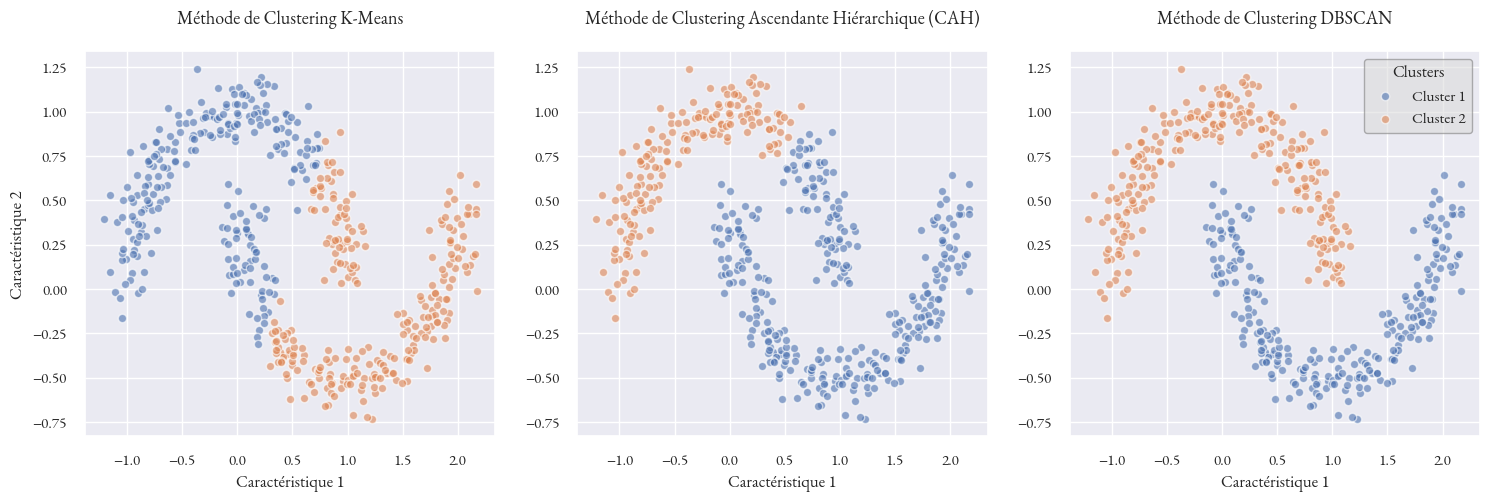

In [1742]:
# ---- K-Means Clustering -------------------------------------------------

# Initialisation de l'algorithme de clustering K-Means avec 2 clusters :
kmeans = KMeans(n_clusters = 2)

# Application de l'algorithme K-Means sur les données X et attribution des clusters prédits à y_kmeans :
y_kmeans = kmeans.fit_predict(X)

# ---- CAH (Clustering Hiérarchique Ascendant) ------------------------------

# Initialisation du clustering hiérarchique ascendant (CAH) avec 2 clusters :
cah = AgglomerativeClustering(n_clusters = 2)

# Application de l'algorithme CAH sur les données X et attribution des clusters prédits à y_cah :
y_cah = cah.fit_predict(X)

# ---- DBSCAN Clustering -------------------------------------------------------

# Initialisation de l'algorithme DBSCAN :
dbscan = DBSCAN(eps = 0.2, 
                min_samples = 5)

# Application de l'algorithme DBSCAN sur les données X et attribution des clusters prédits à y_dbscan :
y_dbscan = dbscan.fit_predict(X)

# ---- Visualisation -------------------------------------------------------------

# Création d'une fonction générique pour visualiser les résultats de clustering :
def plot_clusters(X, 
                  labels, 
                  title,
                  ylabel = False,
                  show_legend = False):
    
    # Création de la liste des clusters uniques (par exemple [0, 1]) :
    clusters = set(labels)

    # Création de la légende pour les clusters :
    for cluster in clusters:

        # Filtre des points appartenant au cluster courant
        cluster_points = X[labels == cluster]

    # Affichage des points du cluster courant avec une couleur spécifique :
        plt.scatter(cluster_points[:, 0], 
                    cluster_points[:, 1], 
                    label=f'Cluster {cluster + 1}', 
                    edgecolors='white',
                    alpha=0.6)
    
    # Définition du titre du graphique
    plt.title(title,
              pad = 20,
              fontsize = '13')
    
    # Étiquette de l'axe des X :
    plt.xlabel('Caractéristique 1')

    # Affichage conditionnel de l'étiquette de l'axe des Y
    if ylabel:
        plt.ylabel('Caractéristique 2')

    # Ajout de la légende pour les clusters
    if show_legend:
        plt.legend(title = 'Clusters',
                   fancybox = True,
                   frameon = True,             
                   framealpha = 0.6,             
                   facecolor = 'gainsboro',
                   edgecolor = 'grey', 
                   bbox_to_anchor = [1, 1])

# -------- Figure avec trois sous-graphique ------------------------------------------

# Création de la figure : 
plt.figure(figsize = (18, 5))

# Visualisation des résultats du clustering K-Means :
plt.subplot(1, 3, 1)
plot_clusters(X, 
              y_kmeans, 
              'Méthode de Clustering K-Means',
              ylabel = True)

# Visualisation des résultats du clustering CAH :
plt.subplot(1, 3, 2)
plot_clusters(X, 
              y_cah, 
              'Méthode de Clustering Ascendante Hiérarchique (CAH)')

# Visualisation des résultats du clustering DBSCAN :
plt.subplot(1, 3, 3)
plot_clusters(X, 
              y_dbscan, 
              'Méthode de Clustering DBSCAN',
              show_legend = True)

# Affichage des graphiques :
plt.show()

##### _La méthode DBSCAN est la plus adaptée au clustering dans ce cas précis._ #####

##### _En effet, DBSCAN peut identifier des clusters de formes arbitraires contrairement à d'autres méthodes de clustering comme K-means ou la CAH._ #####

##### _Cela s'explique par le fonctionnement de DBSCAN qui repose sur la détection de zones de densité pour former des clusters, sans être influencé par la distance globale entre les points._ #####